<a href="https://colab.research.google.com/github/Pathway2008/Loan_rating/blob/main/loan_except_outlier%2Bdivide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
train = pd.read_csv('/content/drive/MyDrive/loan_rating/train.csv')
test = pd.read_csv('/content/drive/MyDrive/loan_rating/test.csv')
sub = pd.read_csv('/content/drive/MyDrive/loan_rating/sample_submission.csv')

In [2]:
train['부채'] = train['연간소득'] * train['부채_대비_소득_비율']
test['부채'] = test['연간소득'] * test['부채_대비_소득_비율']

In [ ]:
train = train[train['주택소유상태'] != 'ANY']
train['근로기간'] = train['근로기간'].replace('< 1 year', '<1 year')
train['근로기간'] = train['근로기간'].replace('1 year', '1 years')
train['근로기간'] = train['근로기간'].replace('3', '3 years')
train['근로기간'] = train['근로기간'].replace('10+years', '10+ years')

In [66]:
from sklearn.preprocessing import LabelEncoder
ordinal_features = ['대출기간', '근로기간', '주택소유상태','대출목적']

for feature in ordinal_features:
    le = LabelEncoder()
    le = le.fit(train[feature])
    train[feature] = le.transform(train[feature])

    for label in np.unique(test[feature]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)
    test[feature] = le.transform(test[feature])

In [75]:
train['대출등급'] = le.fit_transform(train['대출등급'])

In [76]:
train.drop(['ID'],axis=1,inplace=True)
test.drop(['ID'],axis=1,inplace=True)

#Object

In [ ]:
import warnings
import matplotlib.font_manager as fm
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
warnings.filterwarnings('ignore')
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})

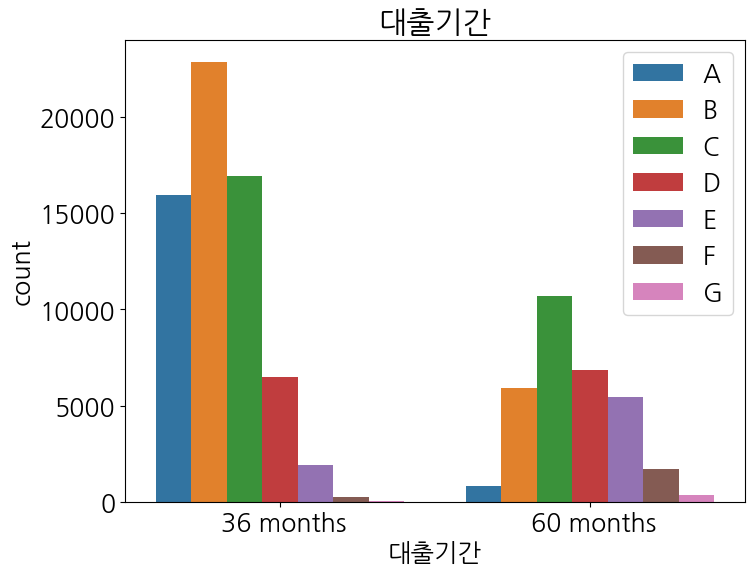

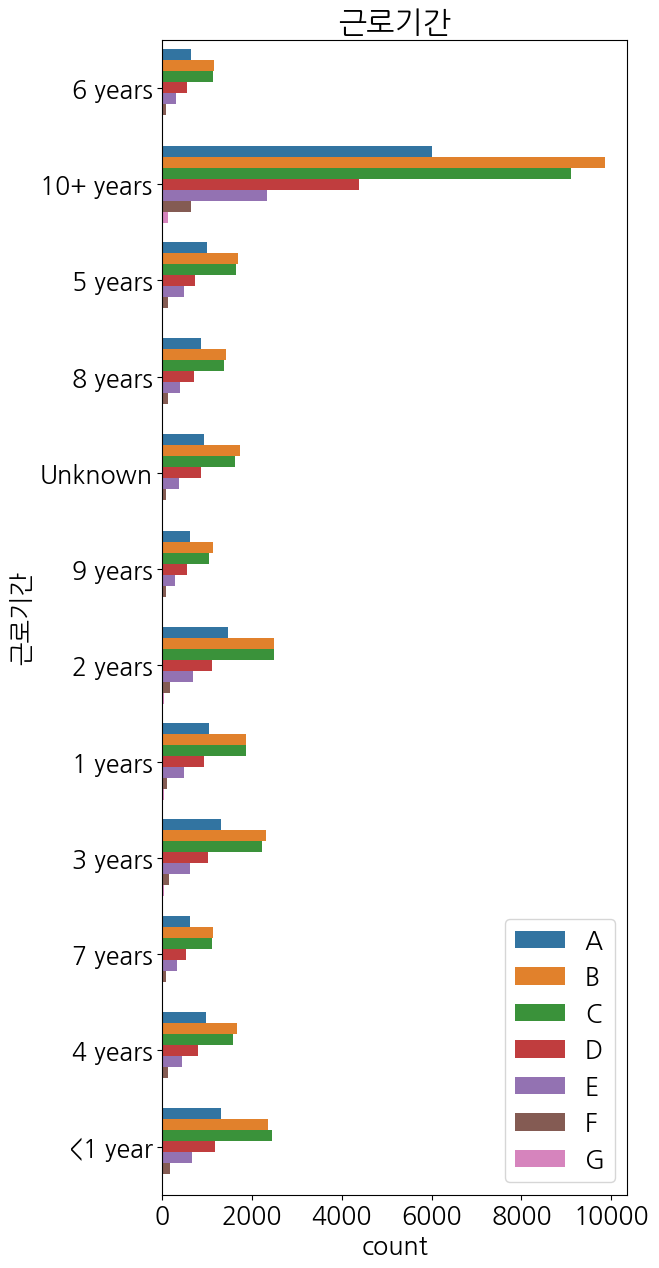

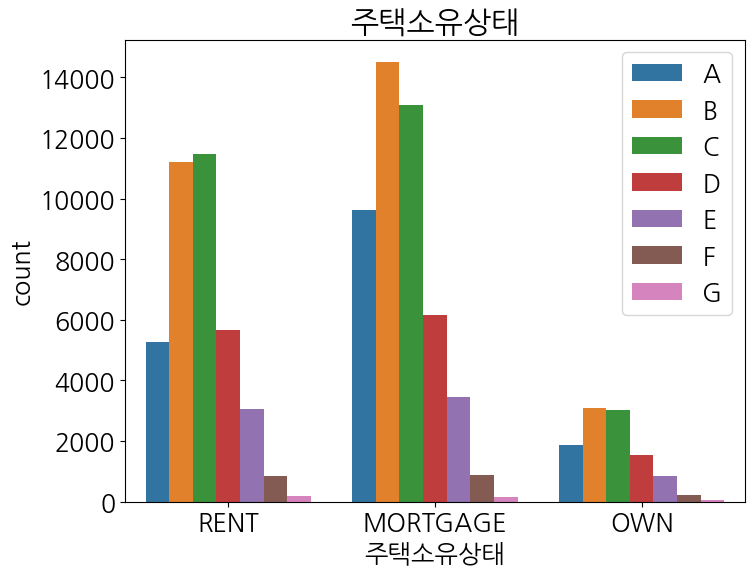

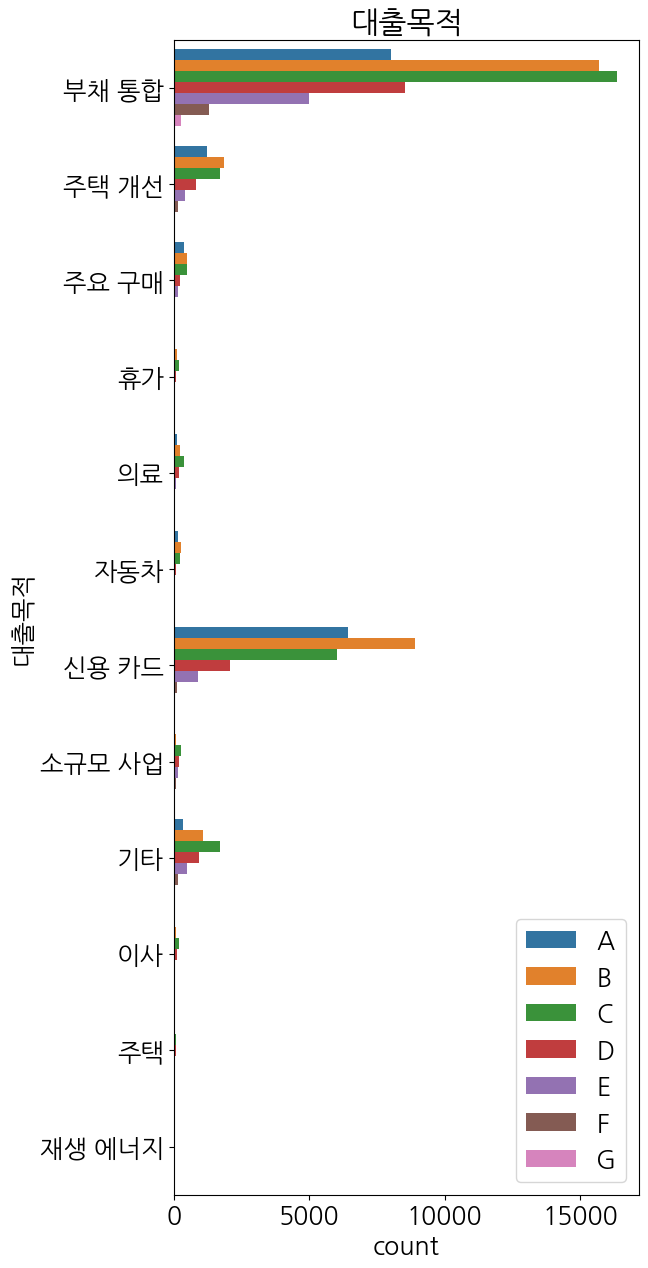

In [118]:
hue_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
list_cat = ['대출기간', '근로기간', '주택소유상태', '대출목적']
for col in list_cat:

    if col in ['근로기간', '대출목적']:

       plt.figure(figsize=(6,15))
       sns.countplot(data=train,y=col, hue='대출등급', hue_order=hue_order)
       plt.title(col)
       plt.legend(loc='lower right')
       plt.show()
    else:

        plt.figure(figsize=(8,6))
        sns.countplot(data=train, x=col, hue='대출등급', hue_order=hue_order)
        plt.title(col)
        plt.legend(loc='upper right')
        plt.show()

#number

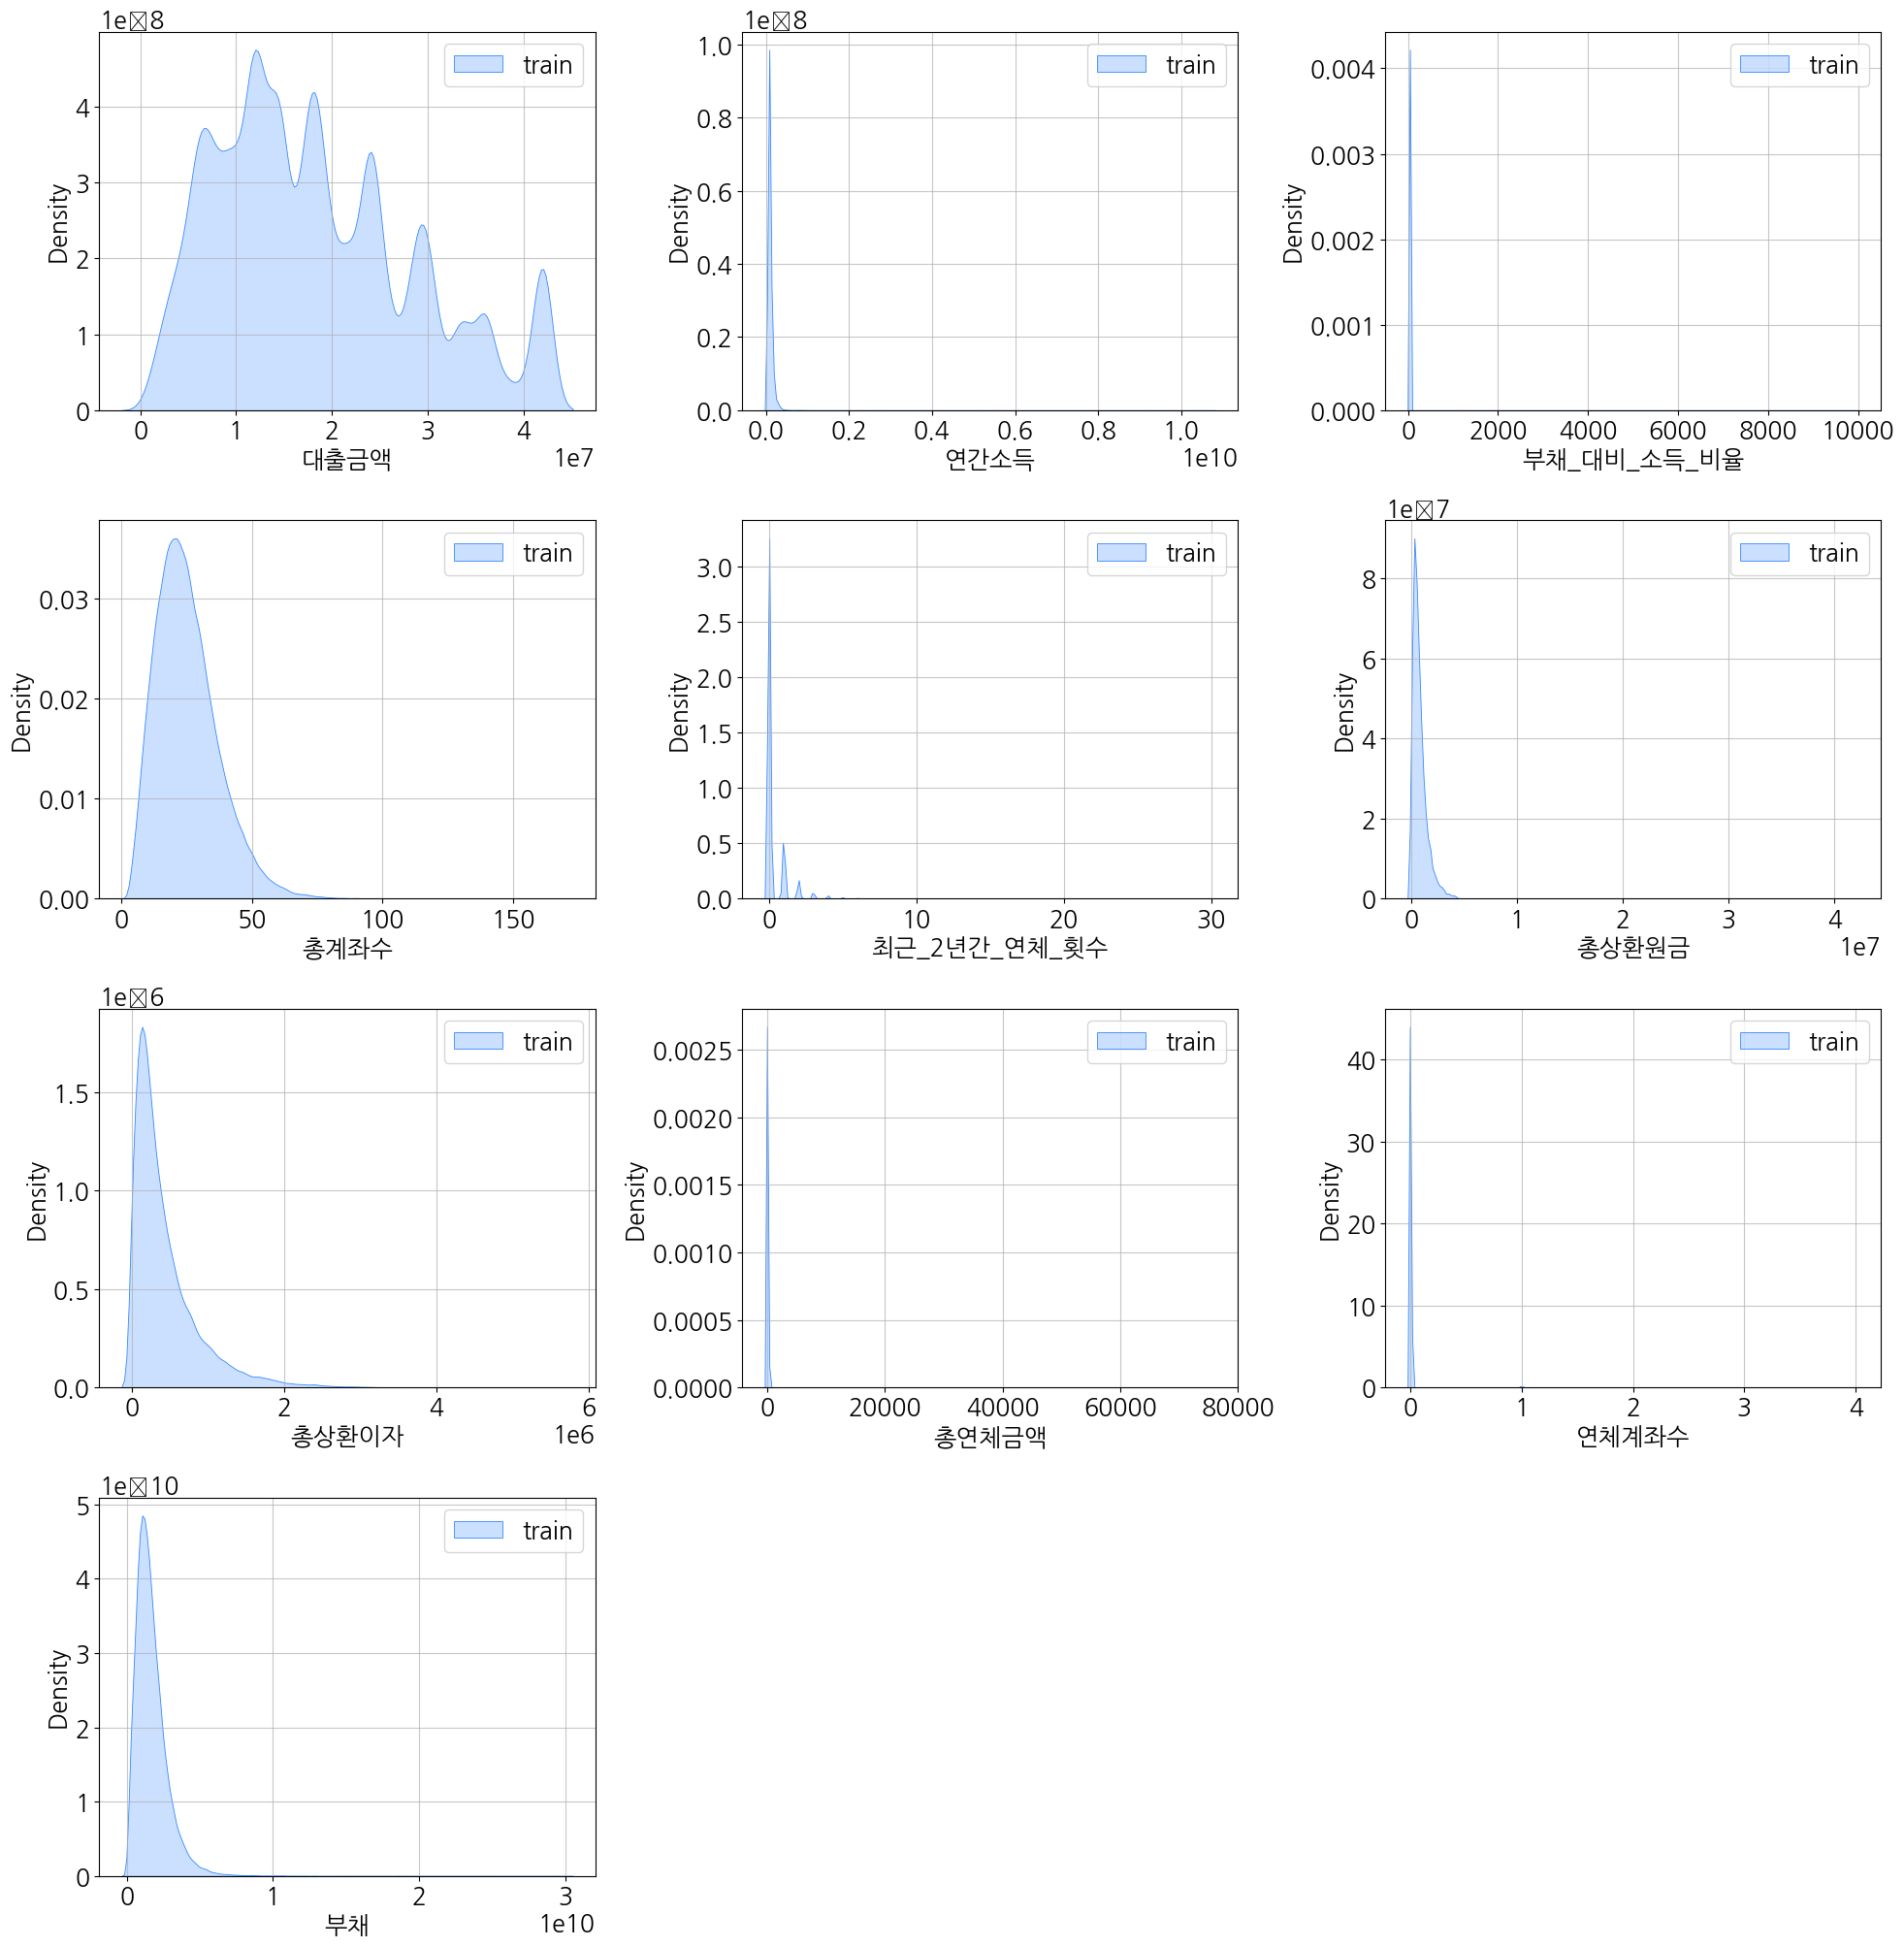

In [119]:
numeric_columns = train.drop(columns=['ID']).select_dtypes(include='number')

fig = plt.figure(figsize=(20, 50))
rows, cols = 10, 3
for idx, num in enumerate(numeric_columns[:30]):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.grid(alpha = 0.7, axis ="both")
    sns.kdeplot(x = num, fill = True,color ="#3386FF",linewidth=0.6, data = train, label = "train")
    ax.set_xlabel(num)
    ax.legend()
fig.tight_layout()
fig.show()

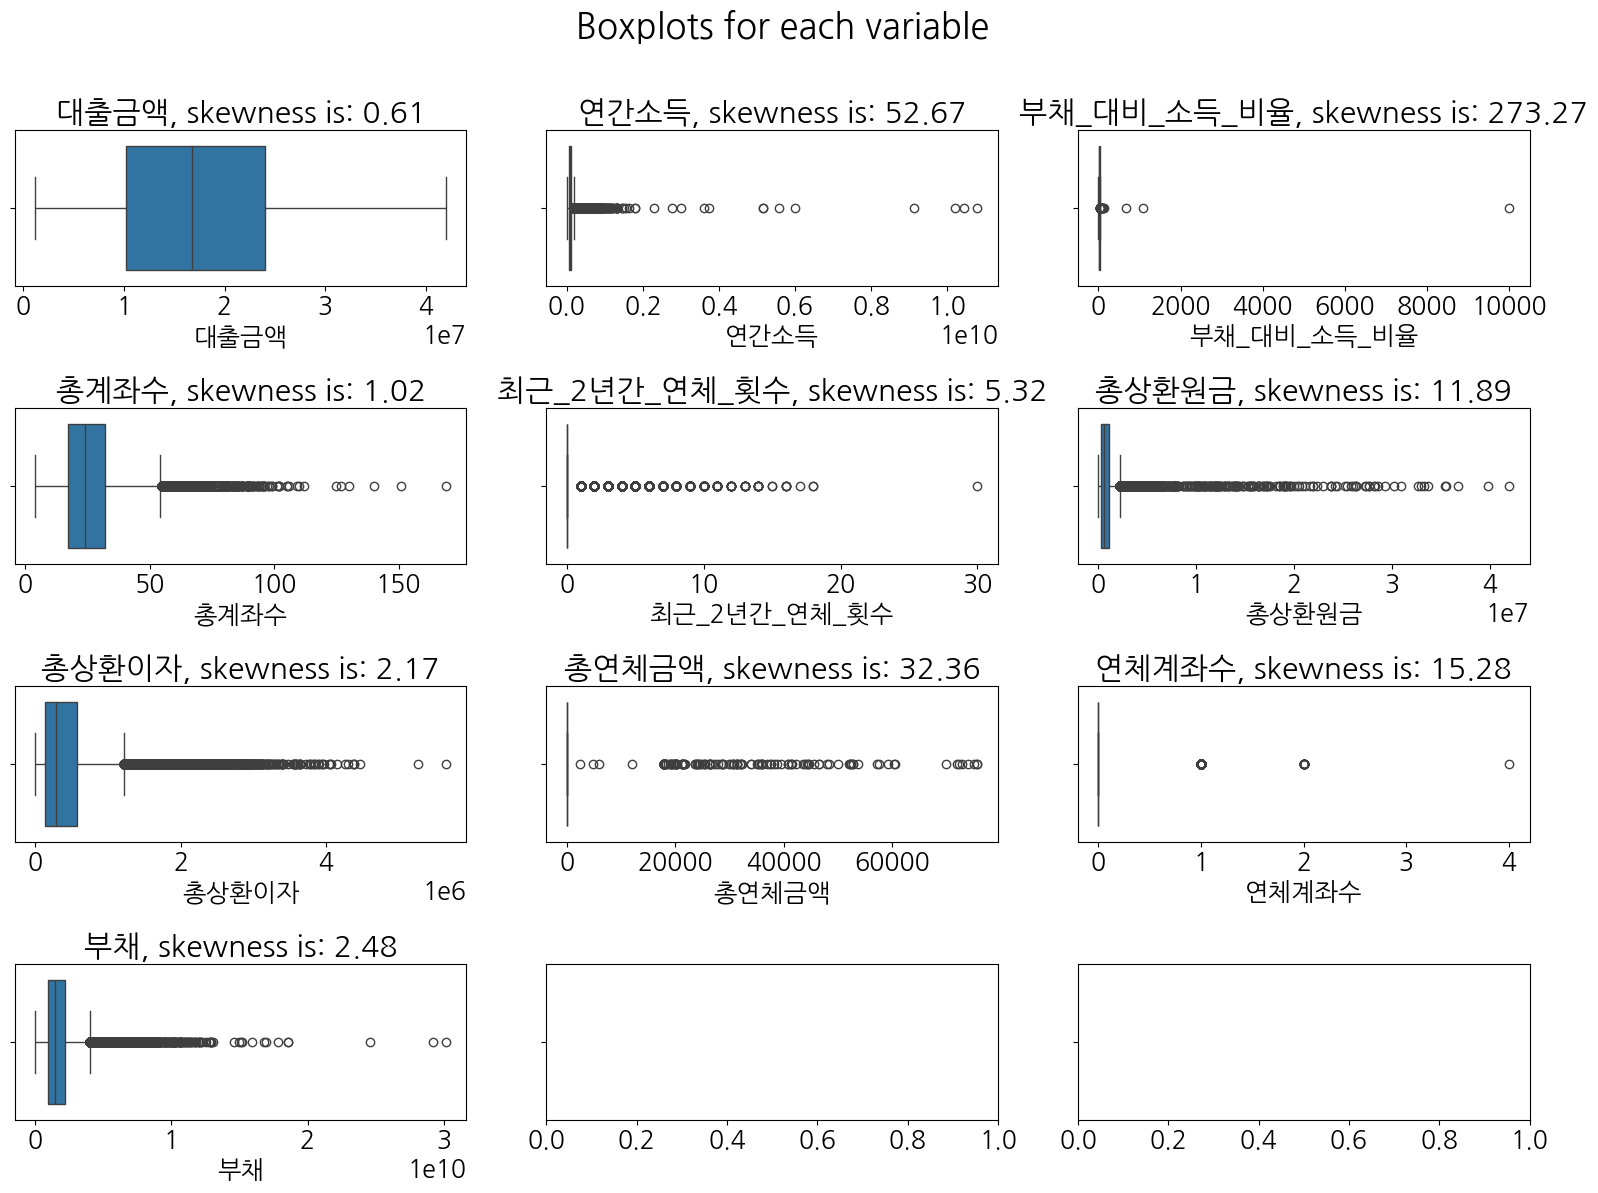

In [7]:
numeric_columns = train.drop(columns=['ID']).select_dtypes(include='number')

# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,3 * rows))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

boxplots_custom(dataset=train, columns_list=numeric_columns, rows=4, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

# Delete outliers

In [8]:
from collections import Counter
def detect_outliers(df,n,features):
    outlier_indices = []

    # iterating over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determining a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        # appending the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # selecting observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )

    return multiple_outliers

In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96293 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   대출금액          96293 non-null  int64  
 1   대출기간          96293 non-null  int64  
 2   근로기간          96293 non-null  int64  
 3   주택소유상태        96293 non-null  int64  
 4   연간소득          96293 non-null  int64  
 5   부채_대비_소득_비율   96293 non-null  float64
 6   총계좌수          96293 non-null  int64  
 7   대출목적          96293 non-null  int64  
 8   최근_2년간_연체_횟수  96293 non-null  int64  
 9   총상환원금         96293 non-null  int64  
 10  총상환이자         96293 non-null  float64
 11  총연체금액         96293 non-null  float64
 12  연체계좌수         96293 non-null  float64
 13  대출등급          96293 non-null  int64  
 14  부채            96293 non-null  float64
dtypes: float64(5), int64(10)
memory usage: 11.8 MB


In [9]:
numeric_columns = train.drop(columns=['대출기간','근로기간','주택소유상태','대출목적','대출등급']).select_dtypes(include='number')
ior = detect_outliers(train,0,numeric_columns)
len(ior)

32414

In [10]:
ior2 = detect_outliers(train,1,numeric_columns)
len(ior2)

7169

In [11]:
df_out = train.drop(ior, axis = 0).reset_index(drop=True)
out_n0 = train.loc[train.index[ior]]
df_out2 = train.drop(ior2, axis = 0).reset_index(drop=True)
out_n1 = train.loc[train.index[ior2]]

# EDA_out(n0/n1)

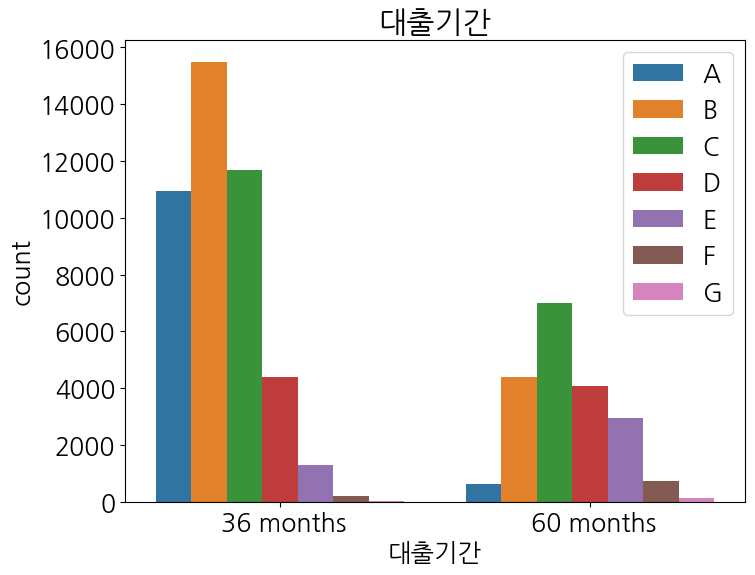

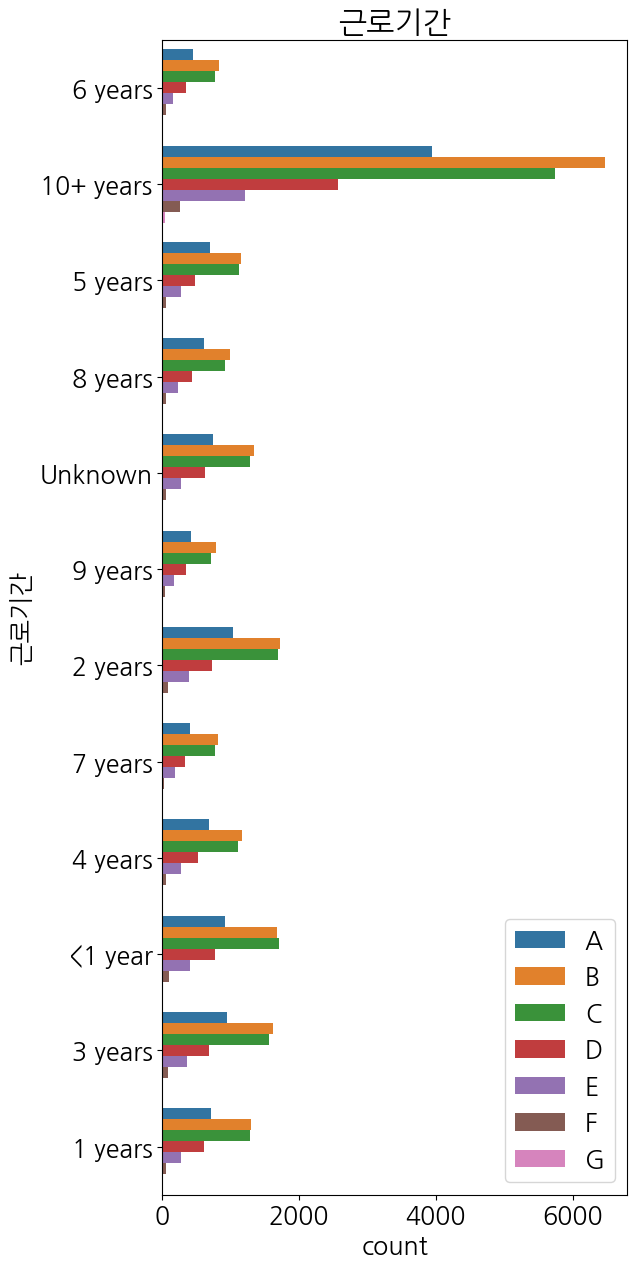

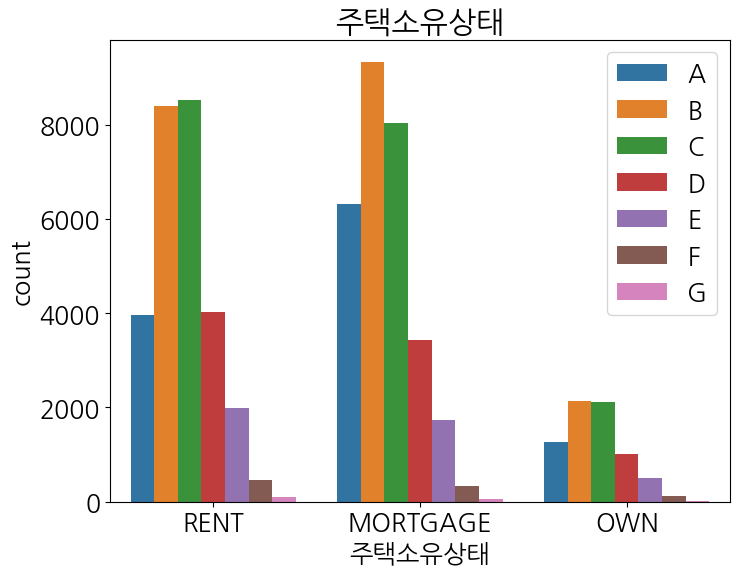

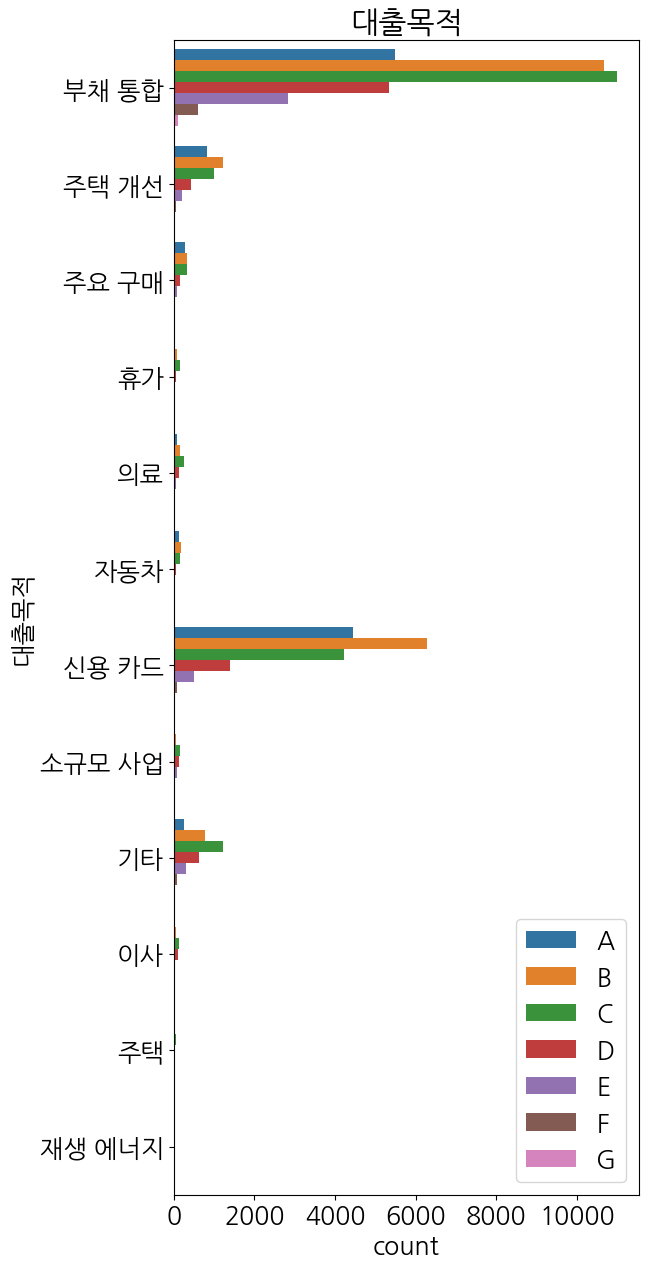

In [12]:
hue_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
list_cat = ['대출기간', '근로기간', '주택소유상태', '대출목적']
for col in list_cat:

    if col in ['근로기간', '대출목적']:

       plt.figure(figsize=(6,15))
       sns.countplot(data=df_out,y=col, hue='대출등급', hue_order=hue_order)
       plt.title(col)
       plt.legend(loc='lower right')
       plt.show()
    else:

        plt.figure(figsize=(8,6))
        sns.countplot(data=df_out, x=col, hue='대출등급', hue_order=hue_order)
        plt.title(col)
        plt.legend(loc='upper right')
        plt.show()

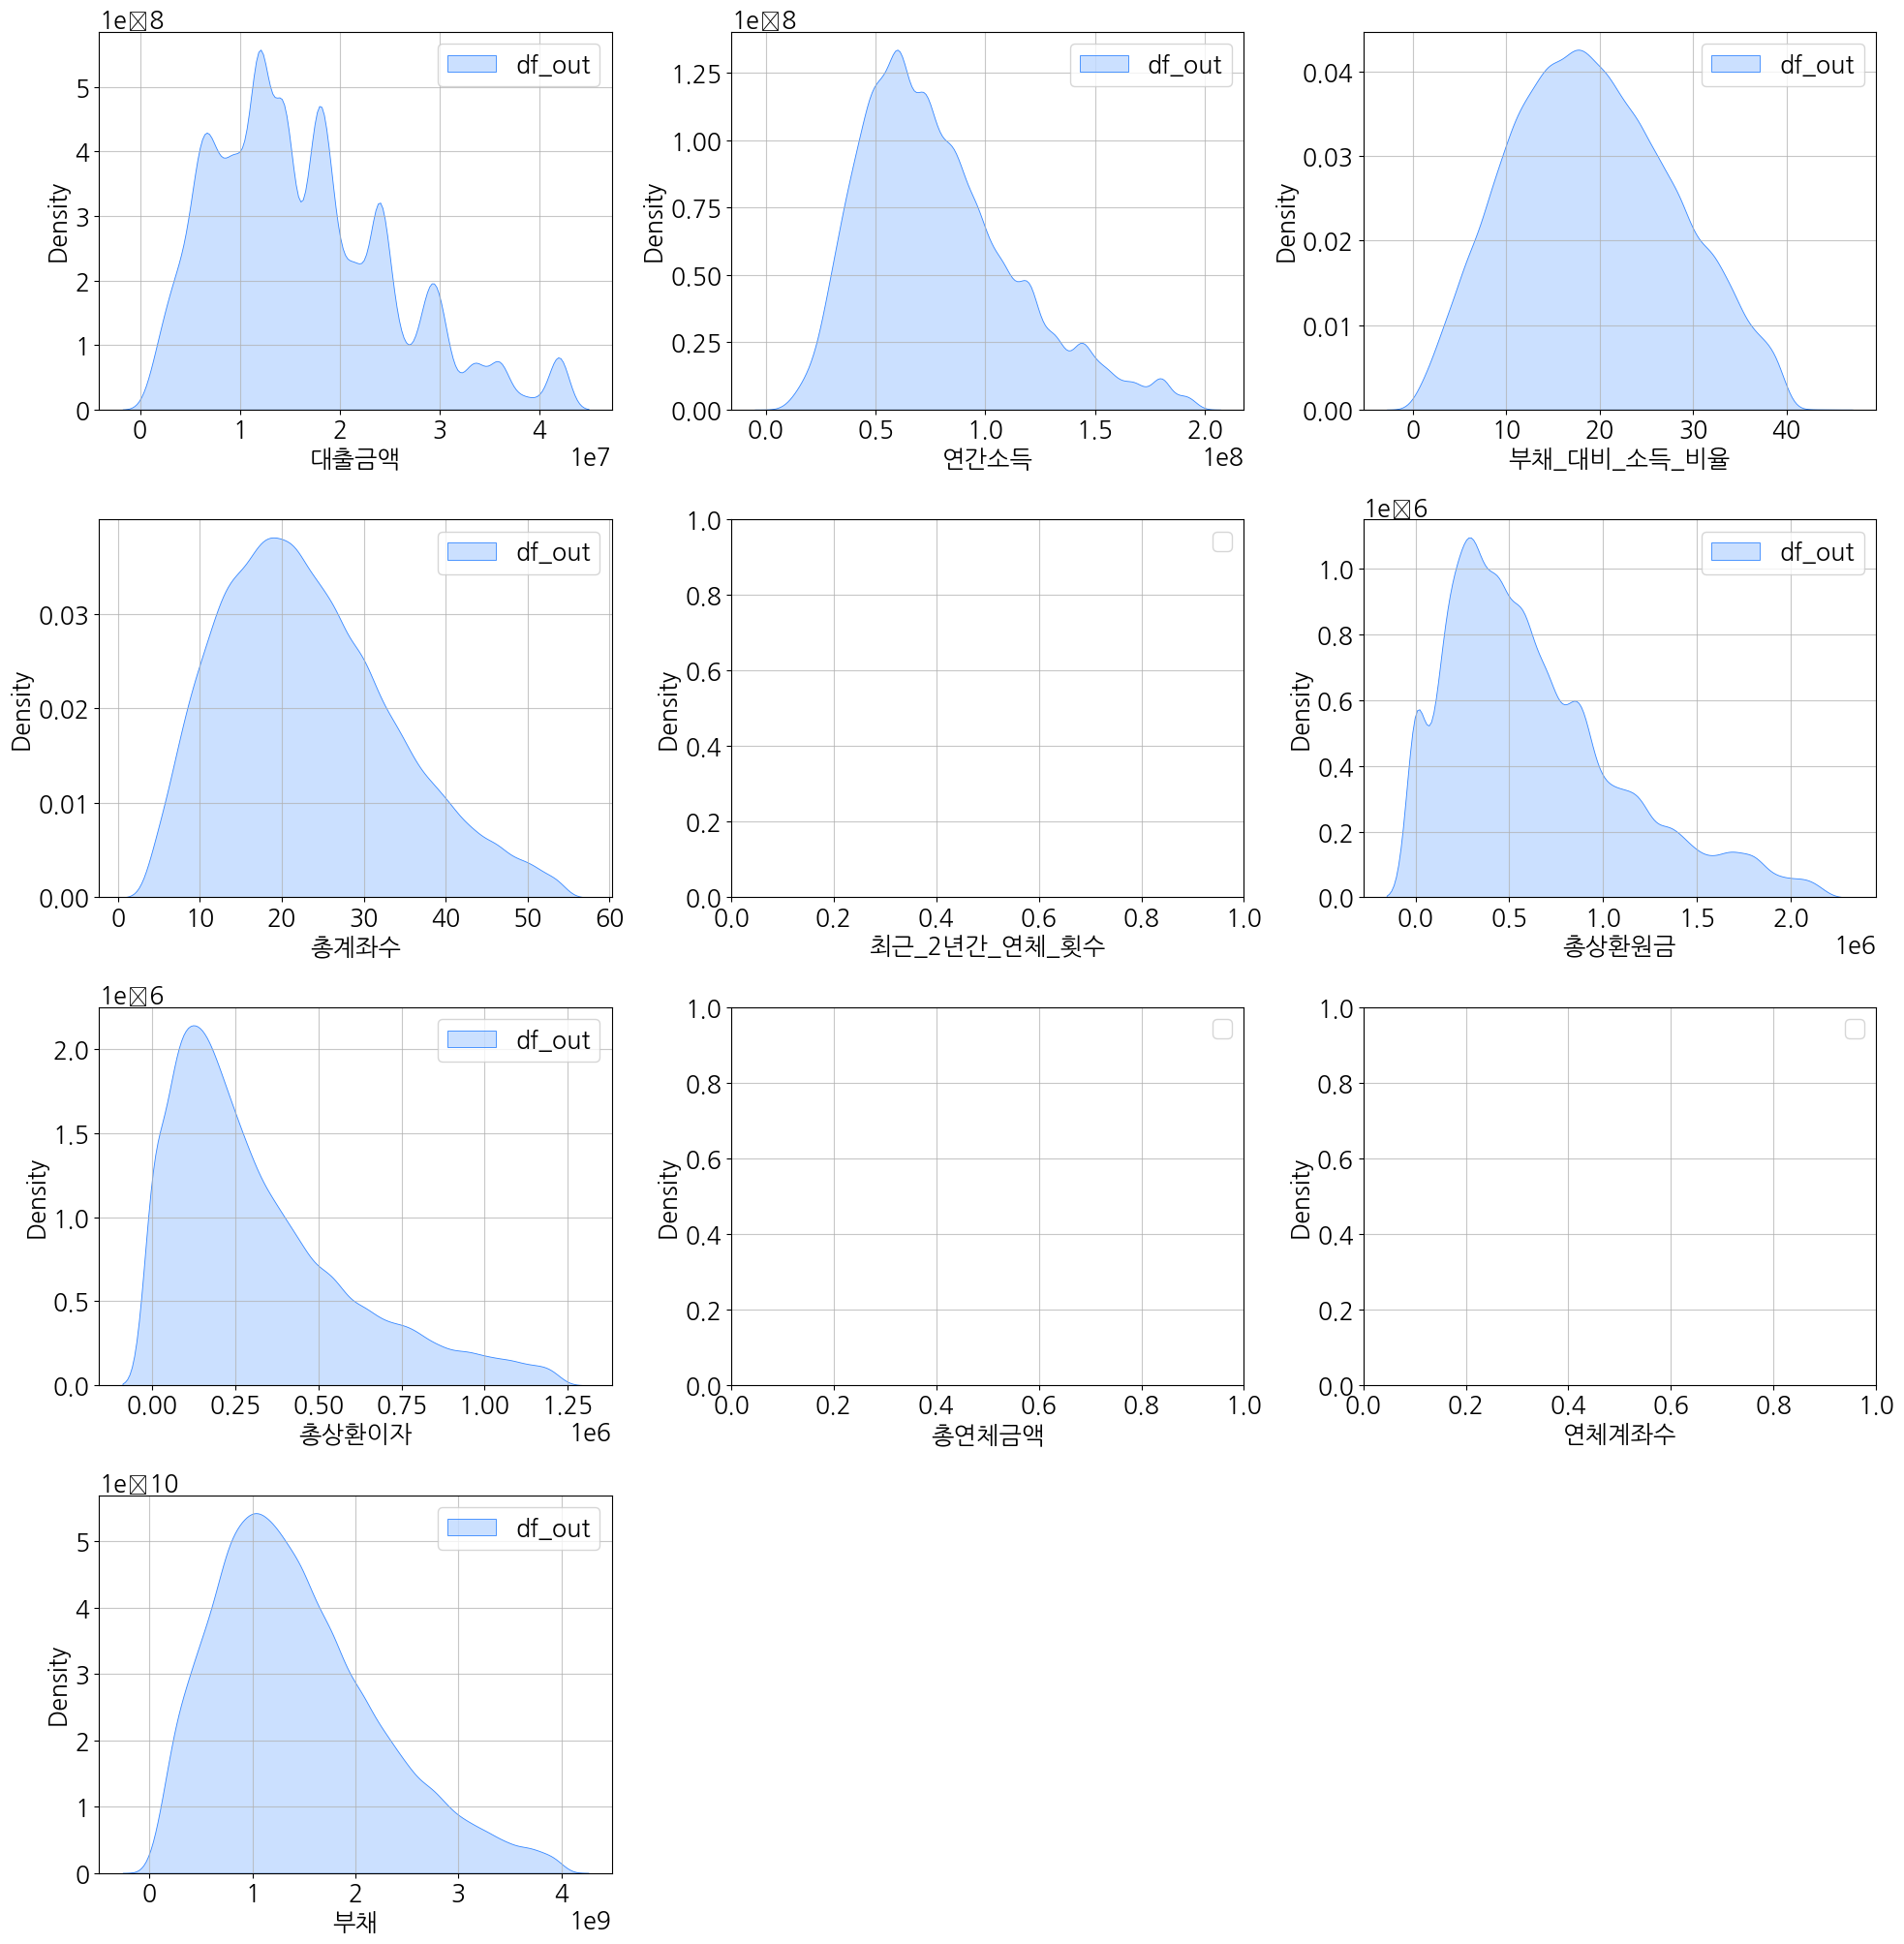

In [13]:
numeric_columns = df_out.drop(columns=['ID']).select_dtypes(include='number')

fig = plt.figure(figsize=(20, 50))
rows, cols = 10, 3
for idx, num in enumerate(numeric_columns[:30]):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.grid(alpha = 0.7, axis ="both")
    sns.kdeplot(x = num, fill = True,color ="#3386FF",linewidth=0.6, data = df_out, label = "df_out")
    ax.set_xlabel(num)
    ax.legend()
fig.tight_layout()
fig.show()

# df2

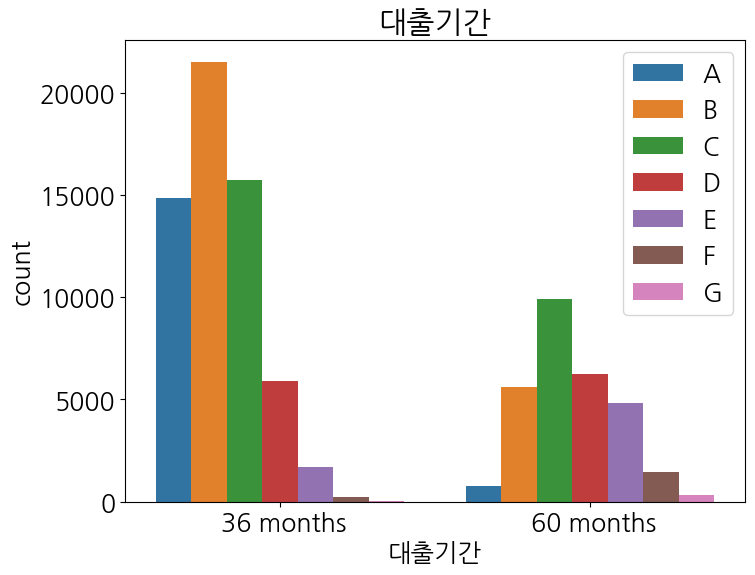

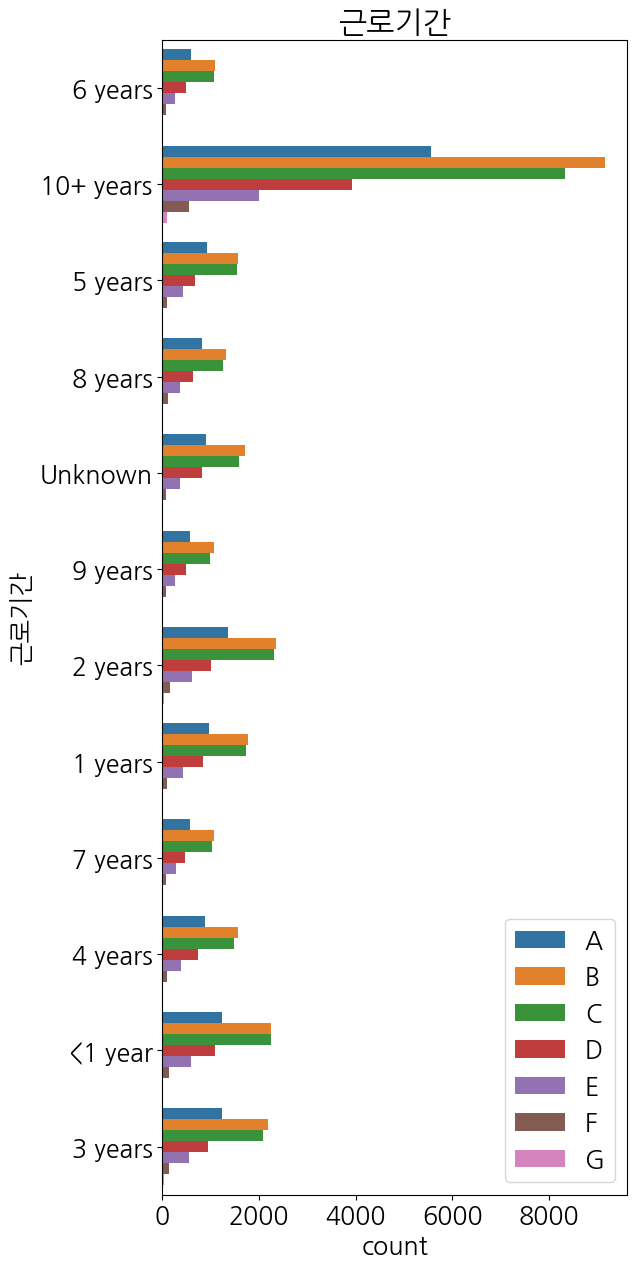

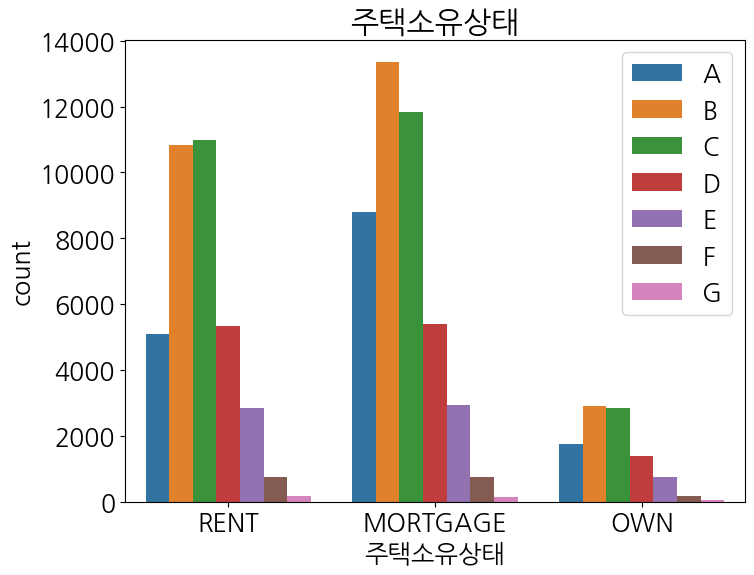

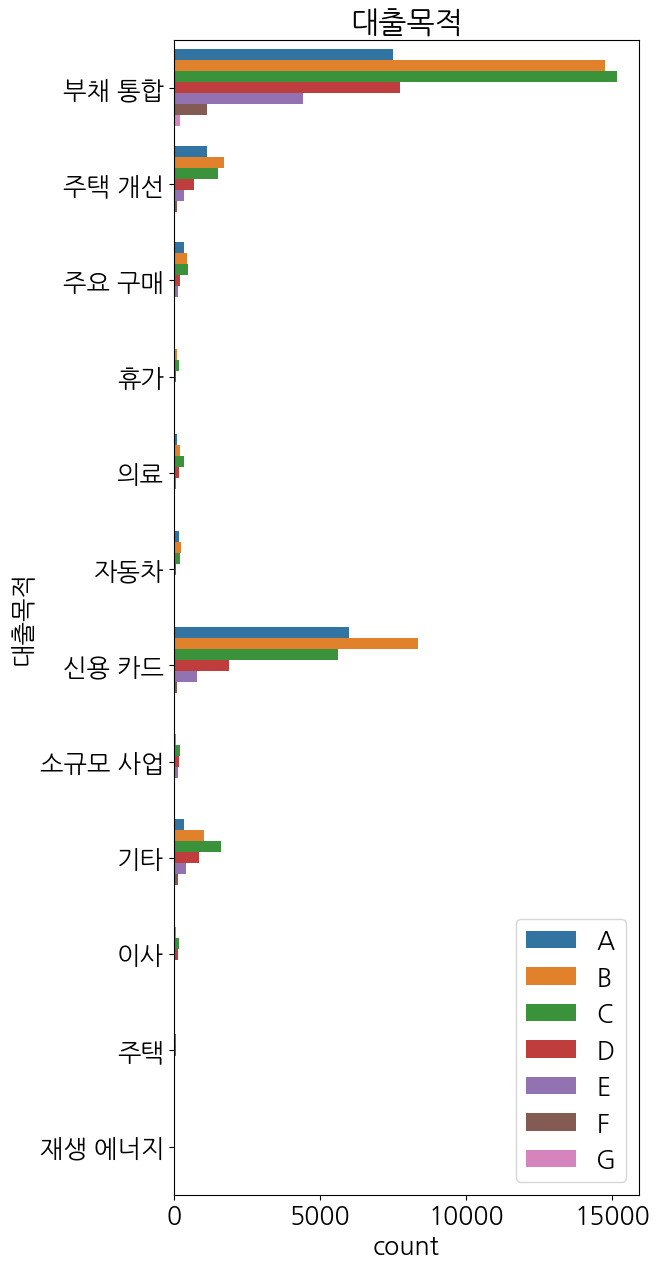

In [14]:
hue_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
list_cat = ['대출기간', '근로기간', '주택소유상태', '대출목적']
for col in list_cat:

    if col in ['근로기간', '대출목적']:

       plt.figure(figsize=(6,15))
       sns.countplot(data=df_out2,y=col, hue='대출등급', hue_order=hue_order)
       plt.title(col)
       plt.legend(loc='lower right')
       plt.show()
    else:

        plt.figure(figsize=(8,6))
        sns.countplot(data=df_out2, x=col, hue='대출등급', hue_order=hue_order)
        plt.title(col)
        plt.legend(loc='upper right')
        plt.show()

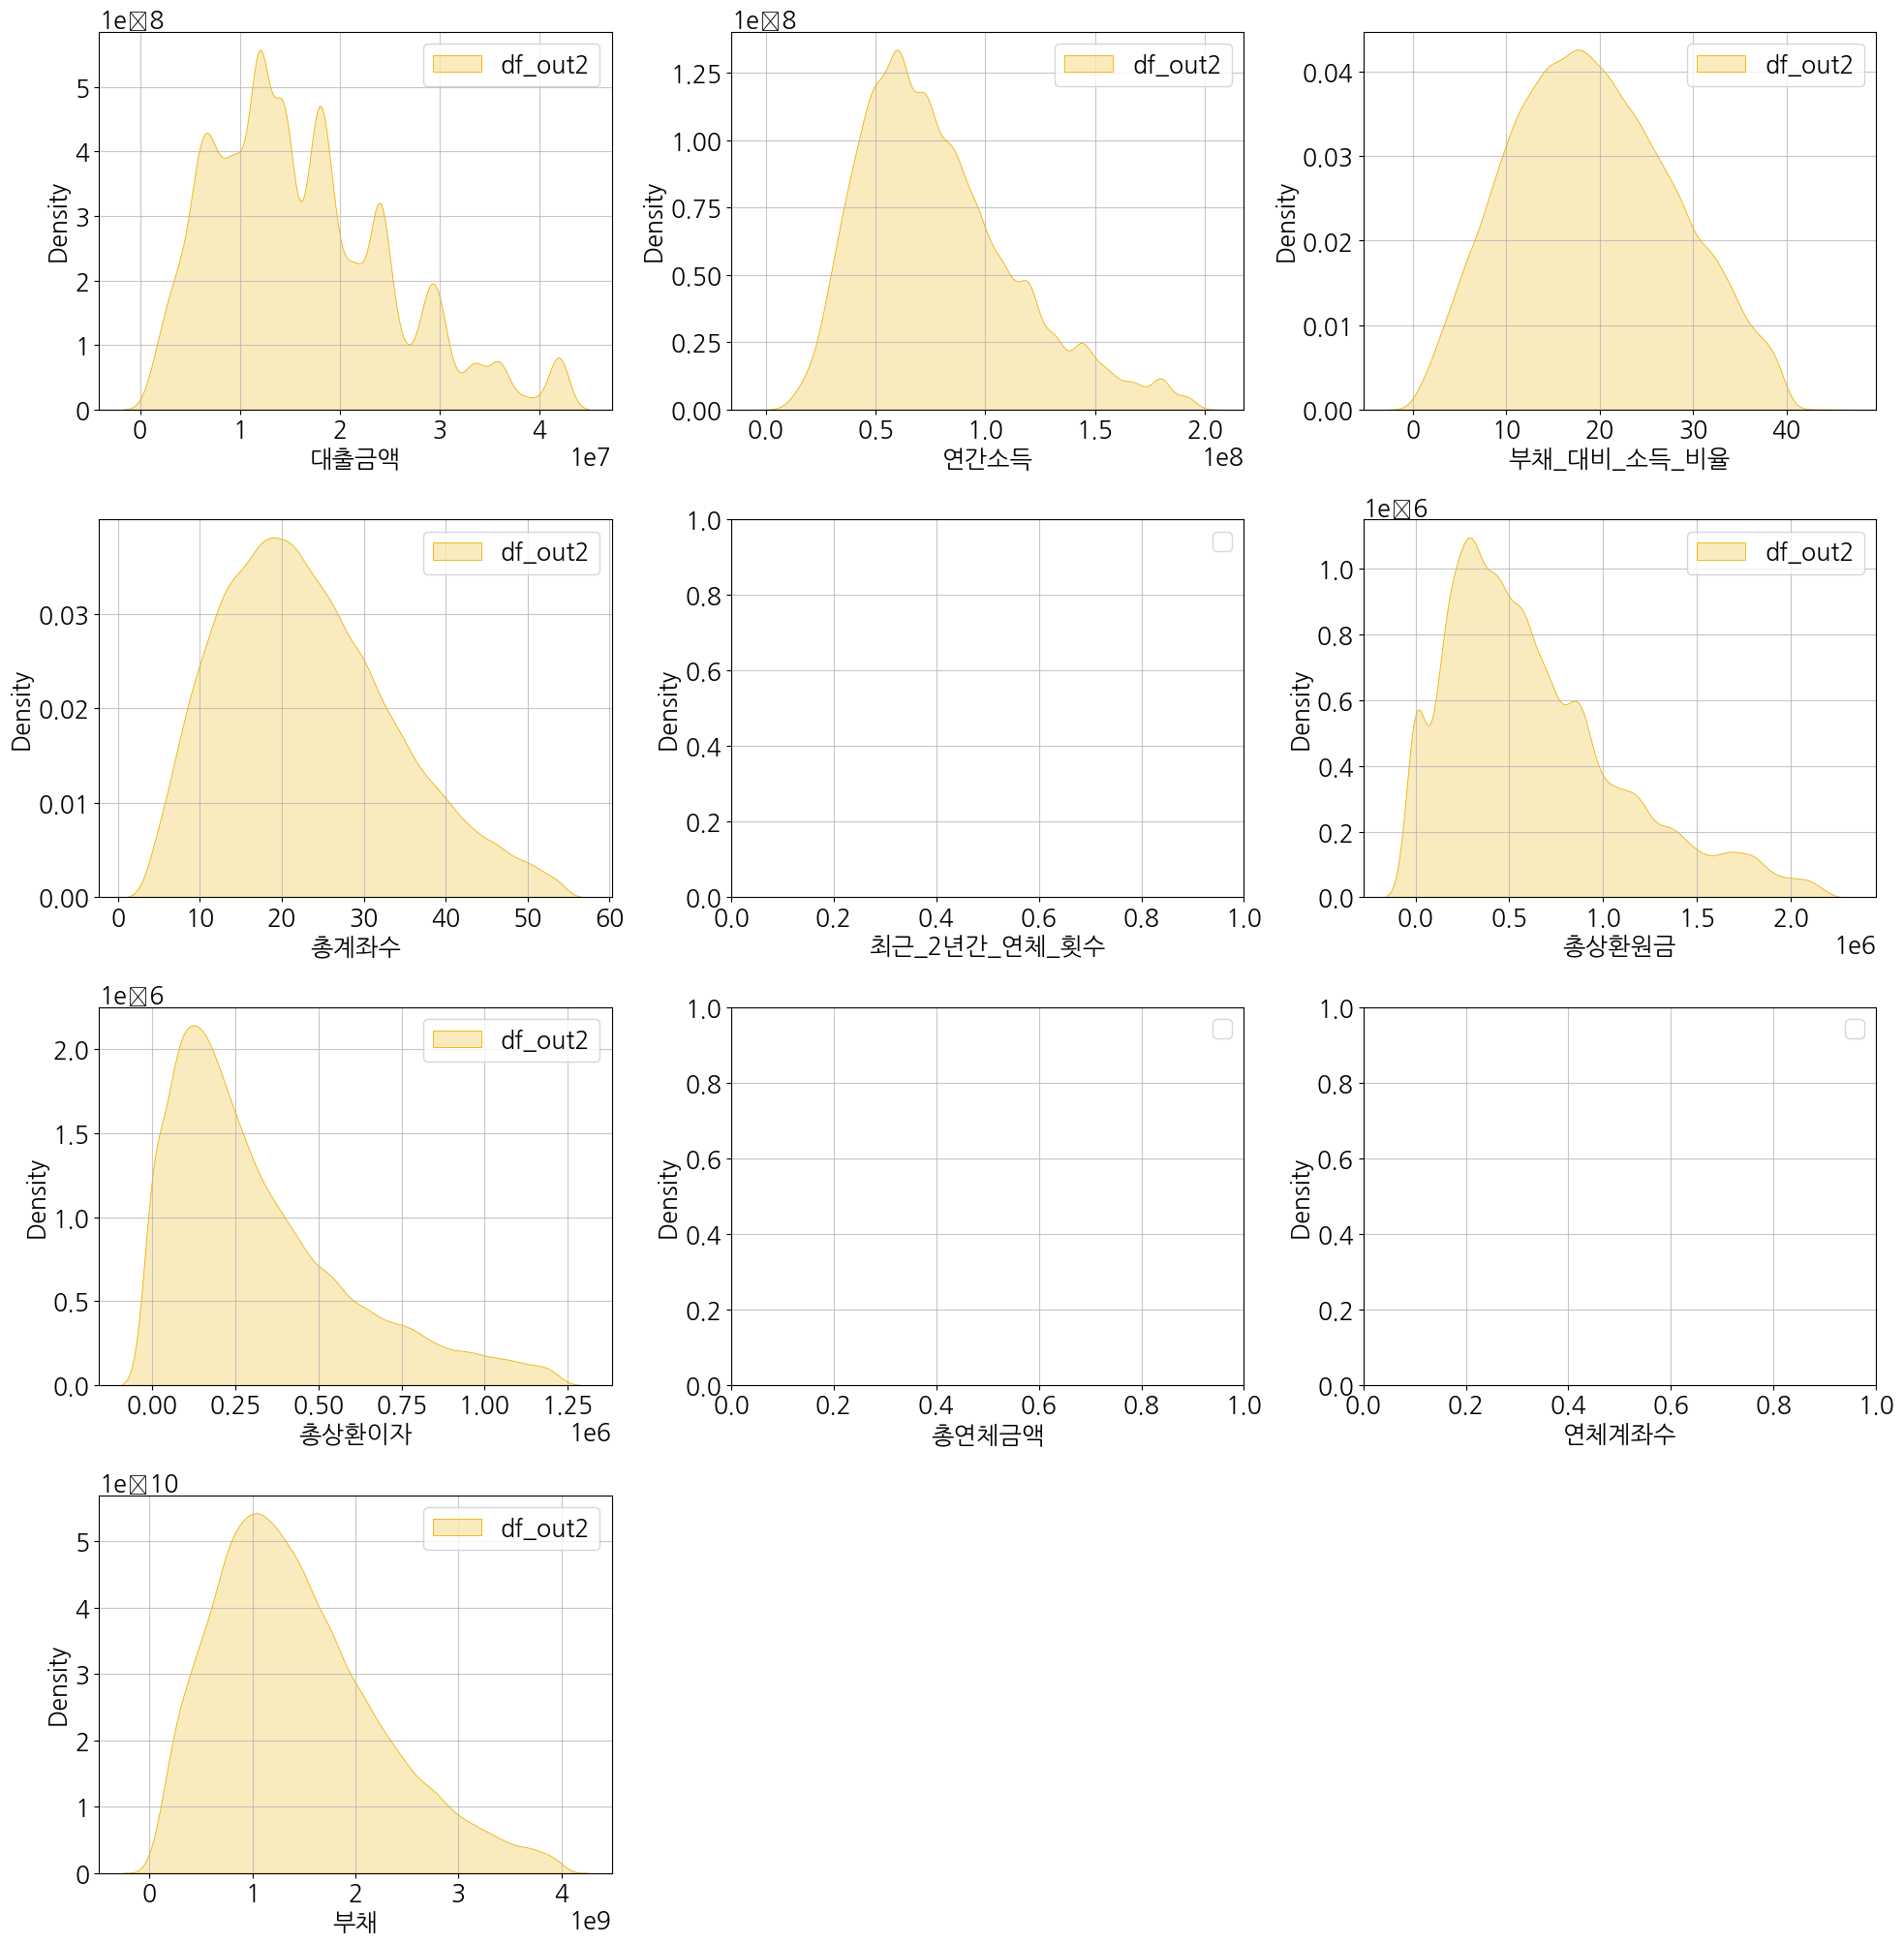

In [11]:
numeric_columns = df_out2.drop(columns=['ID']).select_dtypes(include='number')

fig = plt.figure(figsize=(20, 50))
rows, cols = 10, 3
for idx, num in enumerate(numeric_columns[:30]):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.grid(alpha = 0.7, axis ="both")
    sns.kdeplot(x = num, fill = True,color ="#EFB000",linewidth=0.6, data = df_out, label = "df_out2")
    ax.set_xlabel(num)
    ax.legend()
fig.tight_layout()
fig.show()

In [16]:
train[['최근_2년간_연체_횟수','총연체금액','연체계좌수']].describe()

최근_2년간_연체_횟수         총연체금액         연체계좌수
count  96294.000000  96294.000000  96294.000000
mean       0.345681     54.380584      0.005805
std        0.919119   1414.769218      0.079966
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000
75%        0.000000      0.000000      0.000000
max       30.000000  75768.000000      4.000000

In [30]:
len(train[(train['최근_2년간_연체_횟수']>0)])

19902

In [49]:
len(train[(train['최근_2년간_연체_횟수']>0) & (train['최근_2년간_연체_횟수']<=5)])

19440

In [50]:
len(train[(train['최근_2년간_연체_횟수']>=3)])

2927

In [38]:
len(train[train['총연체금액']>0])

181

In [39]:
len(train[train['연체계좌수']>0])

532

#test

In [40]:
train['대출등급'].value_counts()

B    28817
C    27622
A    16772
D    13354
E     7354
F     1954
G      420
Name: 대출등급, dtype: int64

In [34]:
train[(train['최근_2년간_연체_횟수']==0)]['대출등급'].value_counts()

B    22616
C    21408
A    14377
D    10335
E     5799
F     1527
G      329
Name: 대출등급, dtype: int64

In [39]:
train[(train['최근_2년간_연체_횟수']>0)]['대출등급'].value_counts()

C    6214
B    6201
D    3019
A    2395
E    1555
F     427
G      91
Name: 대출등급, dtype: int64

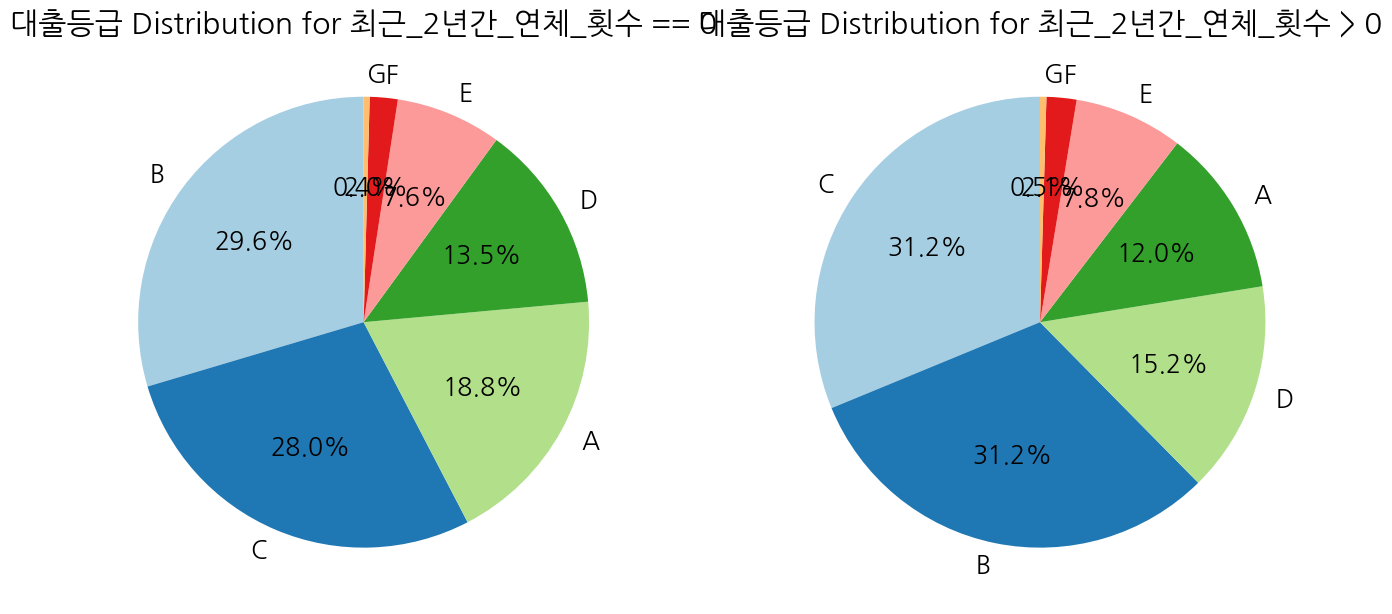

In [36]:
import matplotlib.pyplot as plt

# Filter the data for both conditions
filtered_data_0 = train[train['최근_2년간_연체_횟수'] == 0]
filtered_data_gt_0 = train[train['최근_2년간_연체_횟수'] > 0]

# Count the values in the '대출등급' column for both conditions
value_counts_0 = filtered_data_0['대출등급'].value_counts()
value_counts_gt_0 = filtered_data_gt_0['대출등급'].value_counts()

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot the first pie chart for 최근_2년간_연체_횟수 == 0
axes[0].pie(value_counts_0, labels=value_counts_0.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axes[0].set_title('대출등급 Distribution for 최근_2년간_연체_횟수 == 0')

# Plot the second pie chart for 최근_2년간_연체_횟수 > 0
axes[1].pie(value_counts_gt_0, labels=value_counts_gt_0.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axes[1].set_title('대출등급 Distribution for 최근_2년간_연체_횟수 > 0')

plt.show()

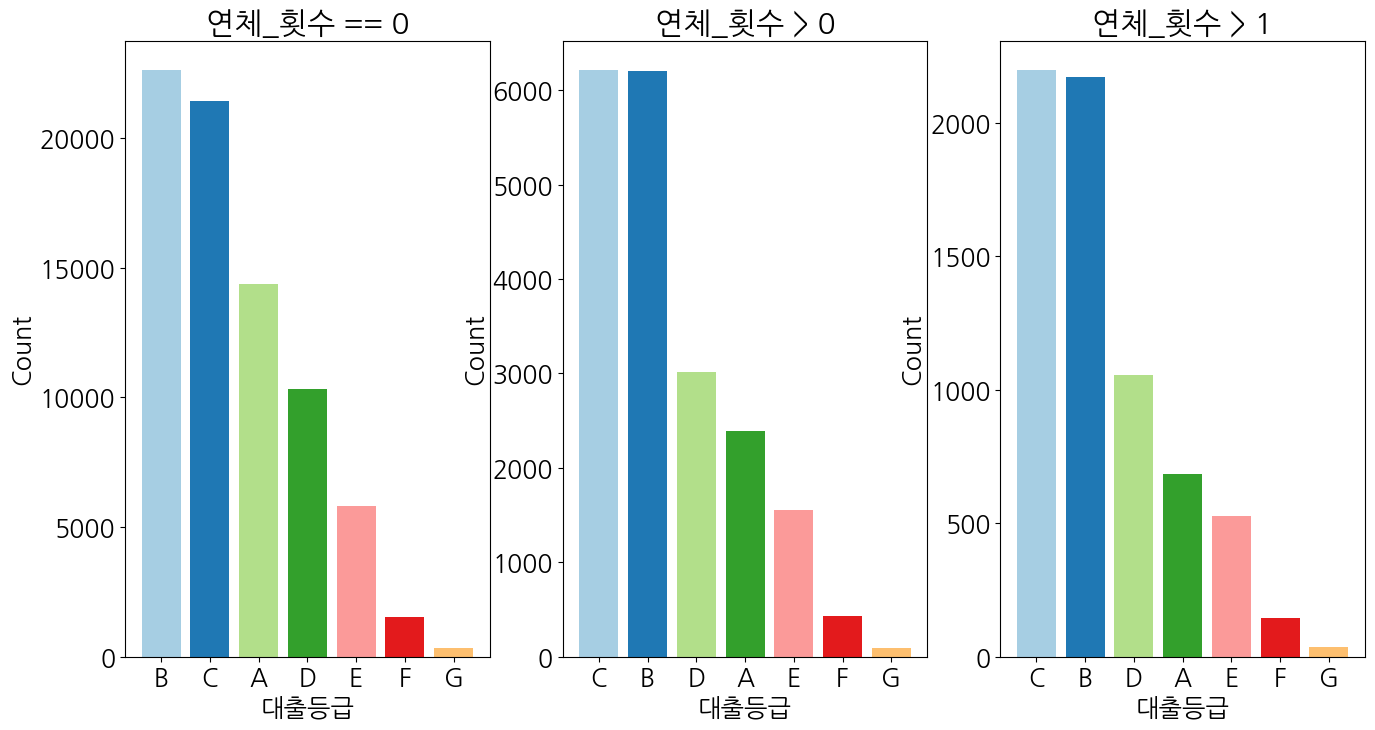

In [38]:
import matplotlib.pyplot as plt

# Filter the data for both conditions
filtered_data_0 = train[train['최근_2년간_연체_횟수'] == 0]
filtered_data_gt_0 = train[train['최근_2년간_연체_횟수'] > 0]
filtered_data_gt_1 = train[train['최근_2년간_연체_횟수'] > 1]

# Count the values in the '대출등급' column for both conditions
value_counts_0 = filtered_data_0['대출등급'].value_counts()
value_counts_gt_0 = filtered_data_gt_0['대출등급'].value_counts()
value_counts_gt_1 = filtered_data_gt_1['대출등급'].value_counts()

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

# Plot the first bar chart for 최근_2년간_연체_횟수 == 0
axes[0].bar(value_counts_0.index, value_counts_0, color=plt.cm.Paired.colors)
axes[0].set_title('연체_횟수 == 0')
axes[0].set_xlabel('대출등급')
axes[0].set_ylabel('Count')

# Plot the second bar chart for 최근_2년간_연체_횟수 > 0
axes[1].bar(value_counts_gt_0.index, value_counts_gt_0, color=plt.cm.Paired.colors)
axes[1].set_title('연체_횟수 > 0')
axes[1].set_xlabel('대출등급')
axes[1].set_ylabel('Count')

axes[2].bar(value_counts_gt_1.index, value_counts_gt_1, color=plt.cm.Paired.colors)
axes[2].set_title('연체_횟수 > 1')
axes[2].set_xlabel('대출등급')
axes[2].set_ylabel('Count')
plt.show()

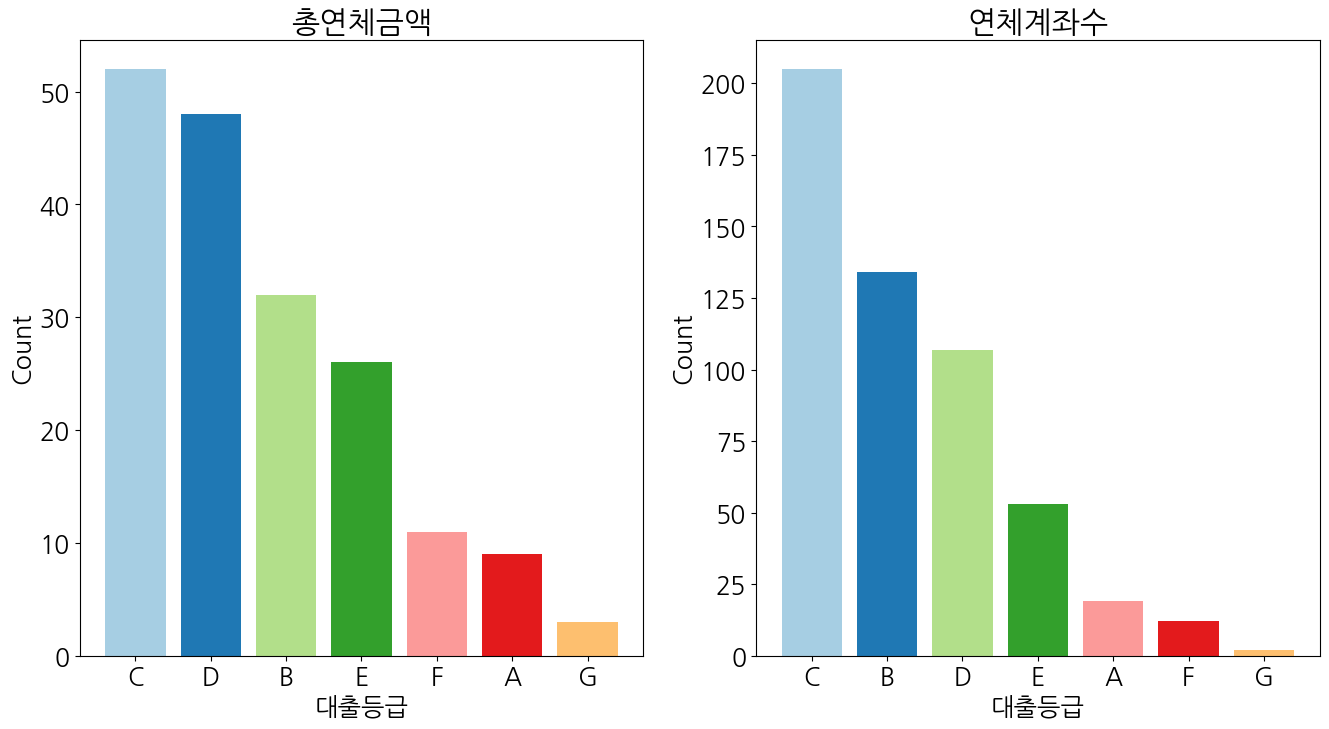

In [42]:
import matplotlib.pyplot as plt

# Filter the data for both conditions
filtered_data_0 = train[train['총연체금액'] > 0]
filtered_data_gt_0 = train[train['연체계좌수']>0]

# Count the values in the '대출등급' column for both conditions
value_counts_0 = filtered_data_0['대출등급'].value_counts()
value_counts_gt_0 = filtered_data_gt_0['대출등급'].value_counts()

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].bar(value_counts_0.index, value_counts_0, color=plt.cm.Paired.colors)
axes[0].set_title('총연체금액')
axes[0].set_xlabel('대출등급')
axes[0].set_ylabel('Count')

axes[1].bar(value_counts_gt_0.index, value_counts_gt_0, color=plt.cm.Paired.colors)
axes[1].set_title('연체계좌수')
axes[1].set_xlabel('대출등급')
axes[1].set_ylabel('Count')


plt.show()

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96293 entries, 0 to 96293
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96293 non-null  object 
 1   대출금액          96293 non-null  int64  
 2   대출기간          96293 non-null  object 
 3   근로기간          96293 non-null  object 
 4   주택소유상태        96293 non-null  object 
 5   연간소득          96293 non-null  int64  
 6   부채_대비_소득_비율   96293 non-null  float64
 7   총계좌수          96293 non-null  int64  
 8   대출목적          96293 non-null  object 
 9   최근_2년간_연체_횟수  96293 non-null  int64  
 10  총상환원금         96293 non-null  int64  
 11  총상환이자         96293 non-null  float64
 12  총연체금액         96293 non-null  float64
 13  연체계좌수         96293 non-null  float64
 14  대출등급          96293 non-null  object 
 15  부채            96293 non-null  float64
dtypes: float64(5), int64(5), object(6)
memory usage: 14.5+ MB


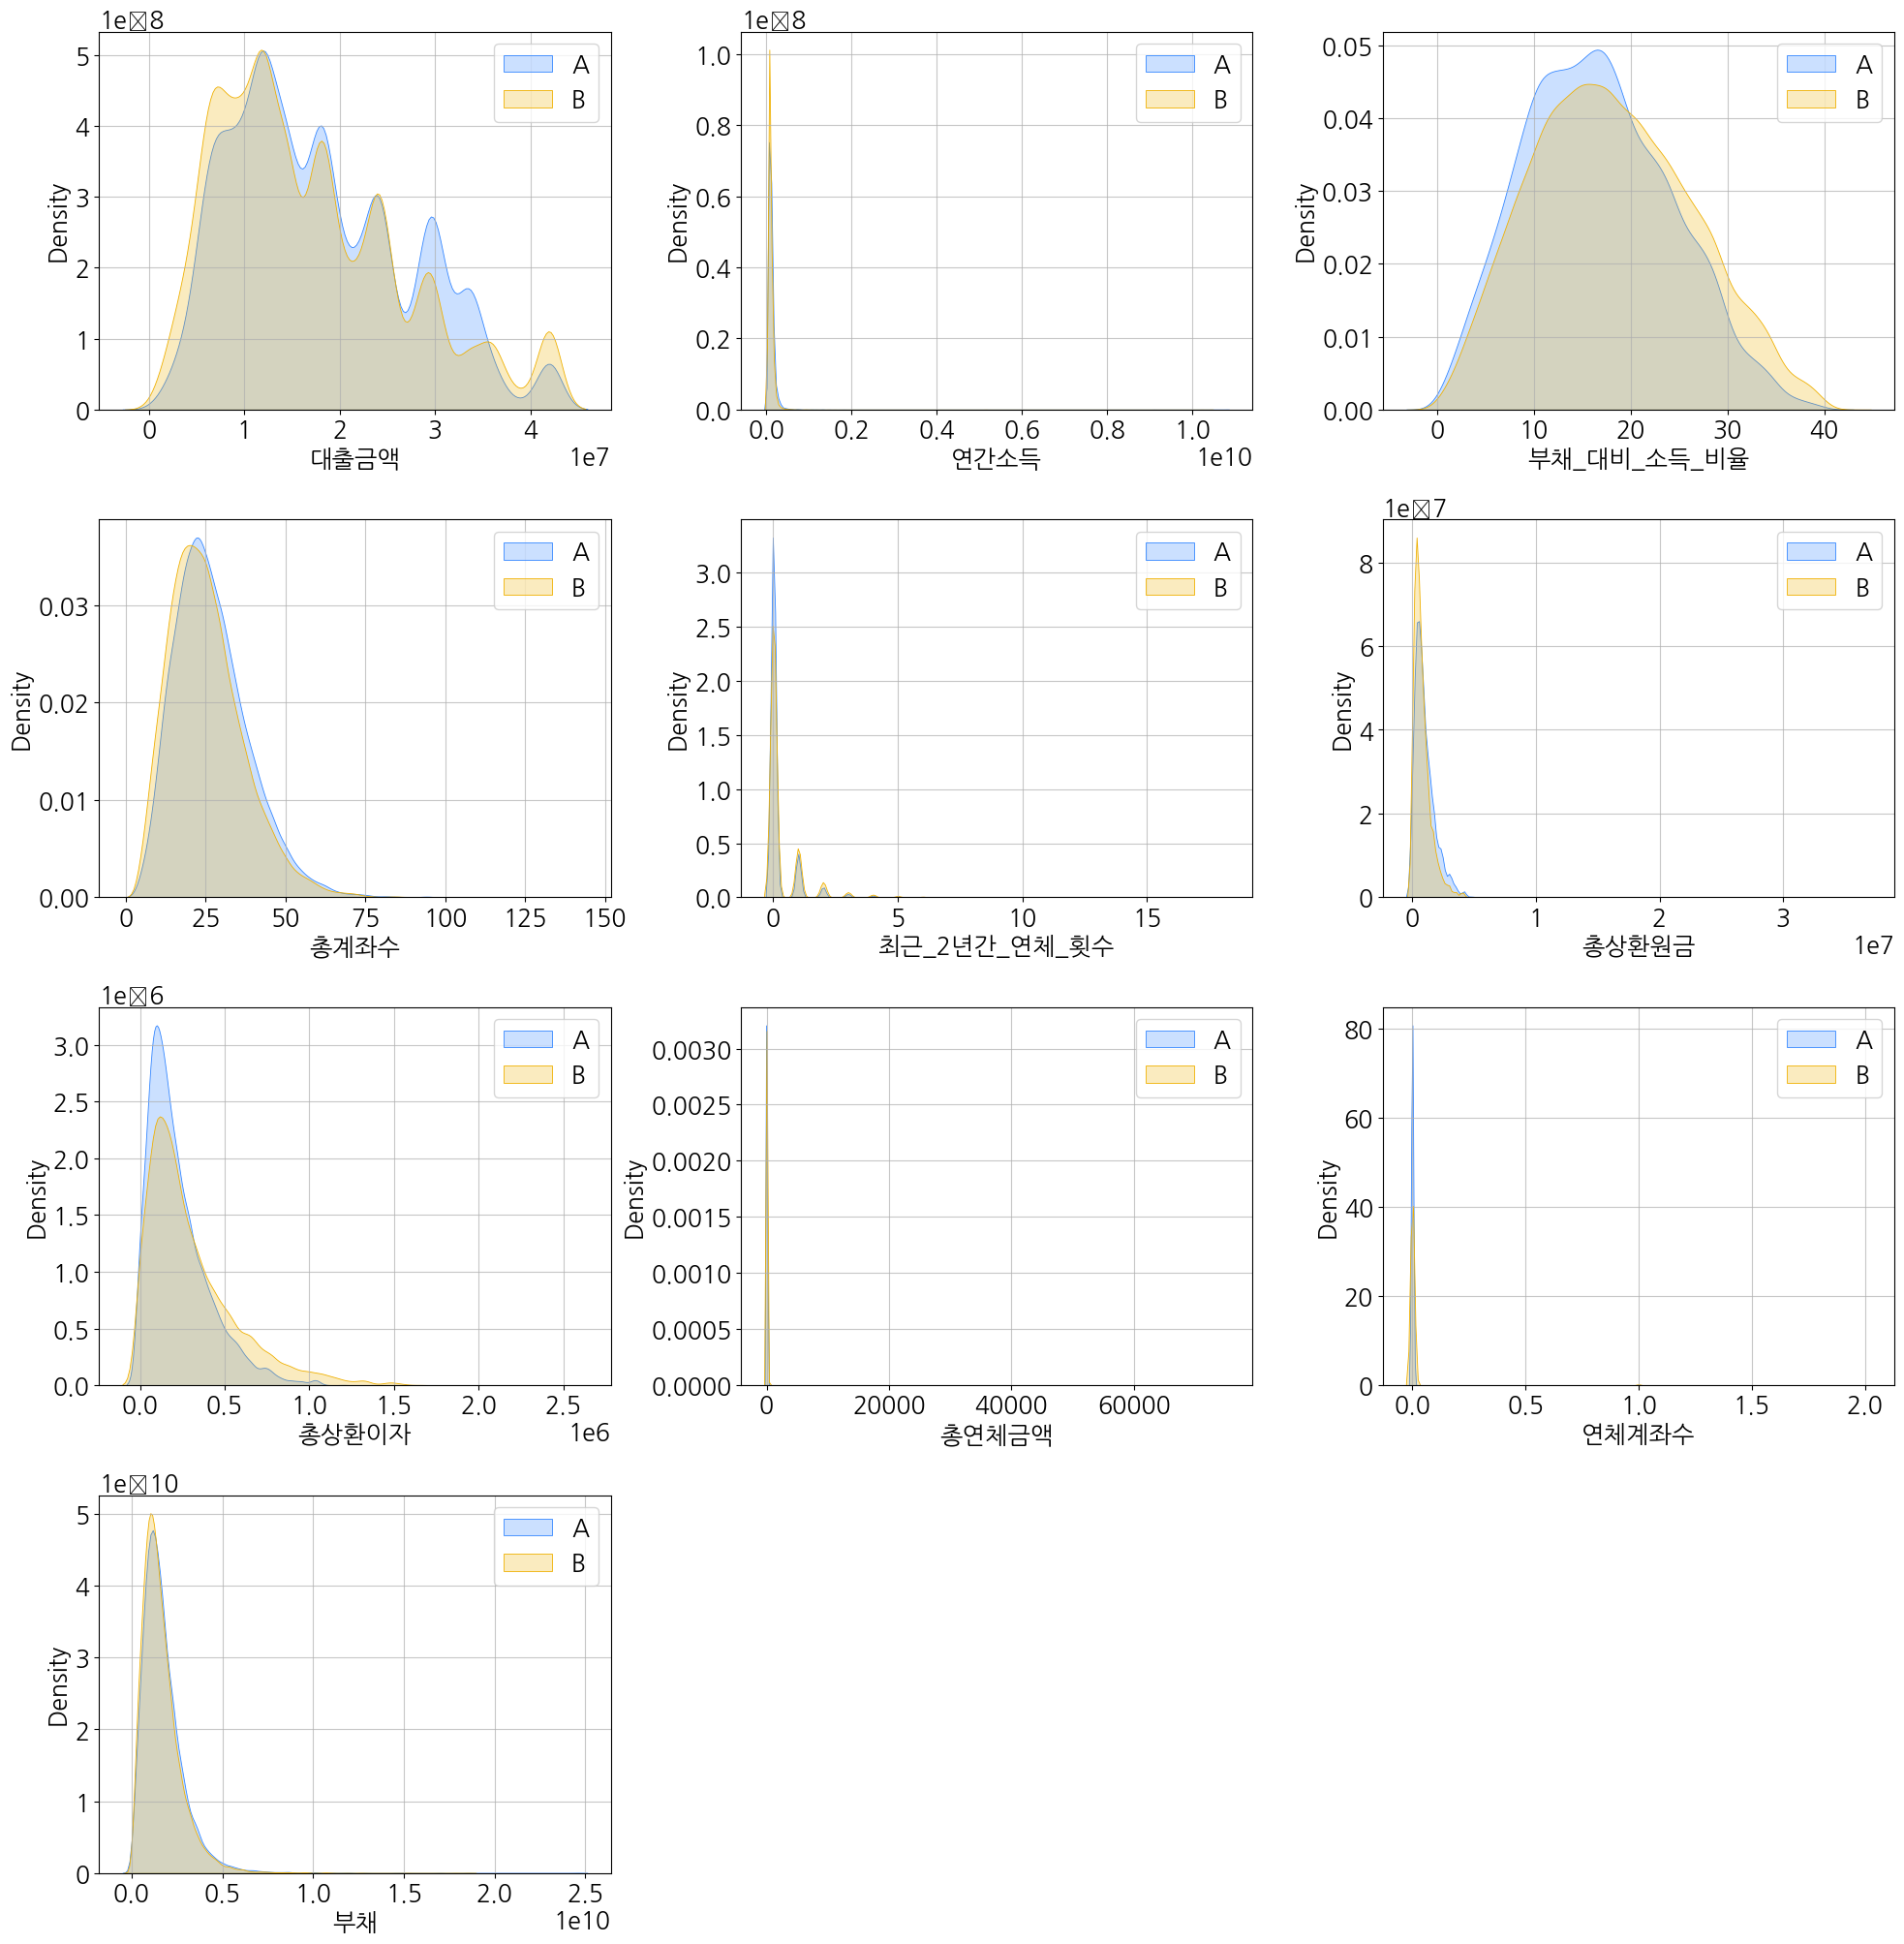

In [44]:
numeric_columns = train.drop(columns=['ID']).select_dtypes(include='number')

fig = plt.figure(figsize=(20, 50))
rows, cols = 10, 3
for idx, num in enumerate(numeric_columns[:30]):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.grid(alpha = 0.7, axis ="both")
    sns.kdeplot(x = num, fill = True,color ="#3386FF",linewidth=0.6, data = train[train['대출등급']=='A'], label = "A")
    sns.kdeplot(x = num, fill = True,color ="#EFB000",linewidth=0.6, data = train[train['대출등급']=='B'], label = "B")
    ax.set_xlabel(num)
    ax.legend()
fig.tight_layout()
fig.show()

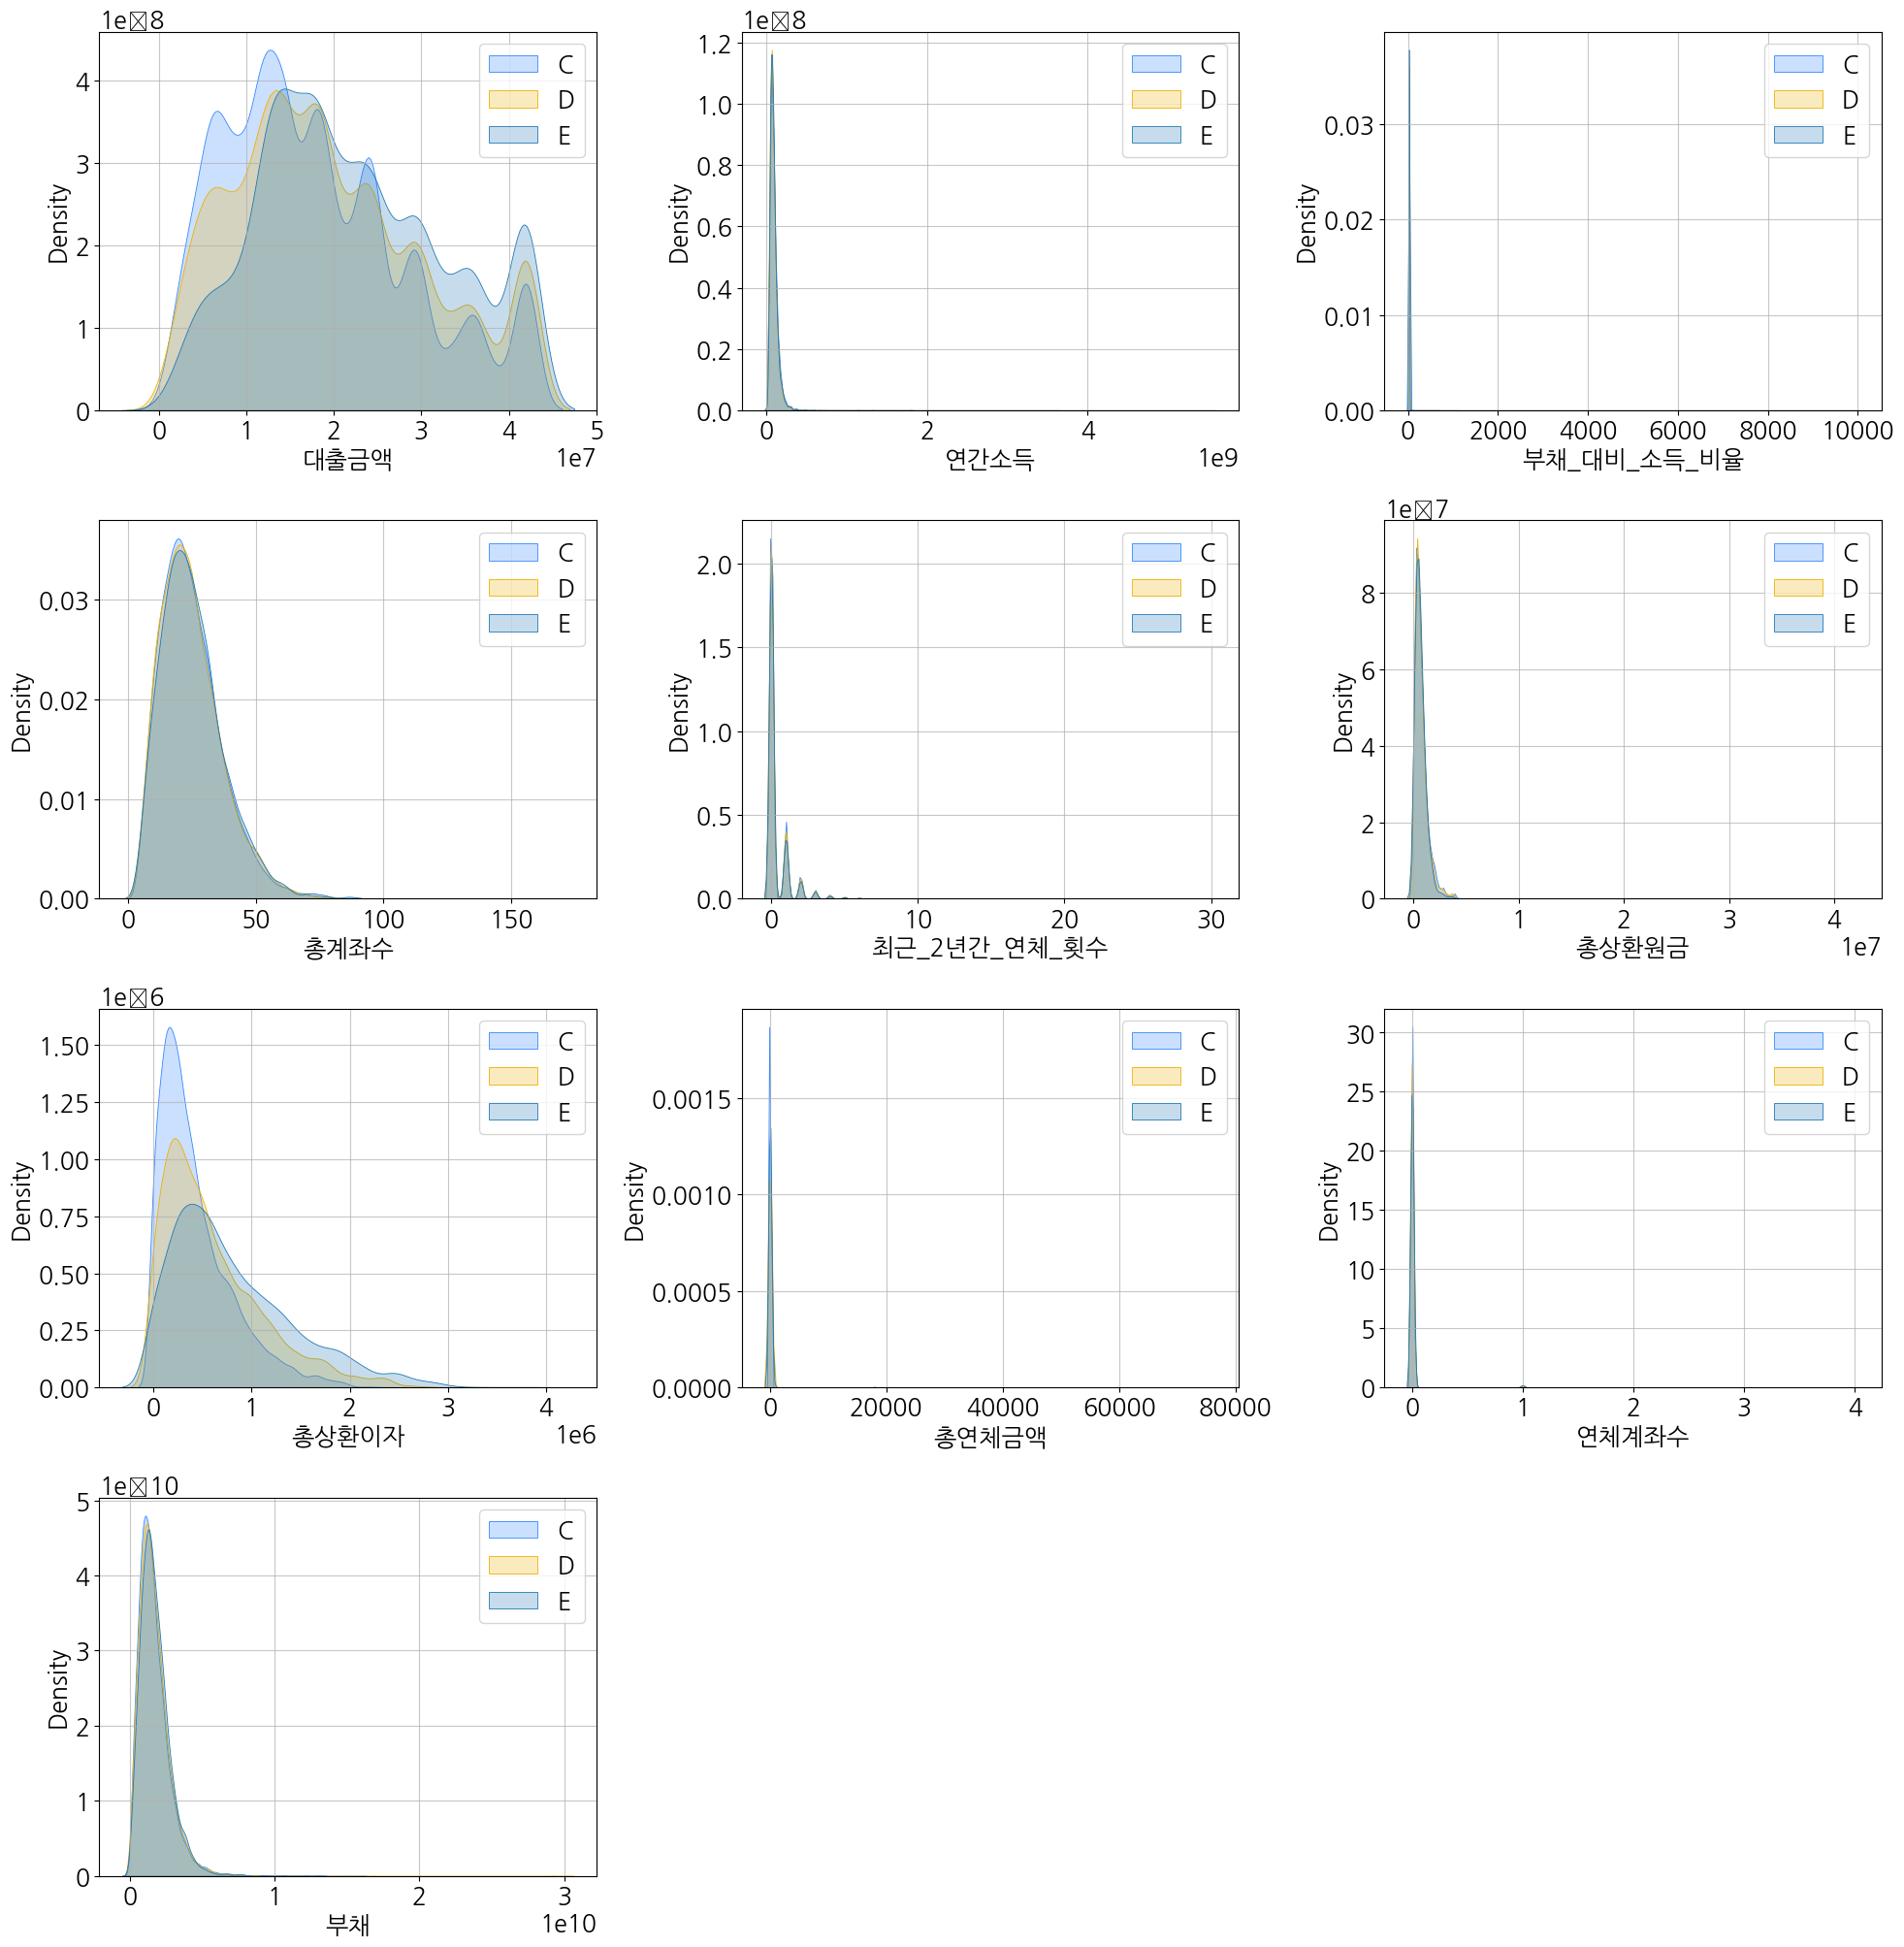

In [47]:
numeric_columns = train.drop(columns=['ID']).select_dtypes(include='number')

fig = plt.figure(figsize=(20, 50))
rows, cols = 10, 3
for idx, num in enumerate(numeric_columns[:30]):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.grid(alpha = 0.7, axis ="both")
    sns.kdeplot(x = num, fill = True,color ="#3386FF",linewidth=0.6, data = train[train['대출등급']=='C'], label = "C")
    sns.kdeplot(x = num, fill = True,color ="#EFB000",linewidth=0.6, data = train[train['대출등급']=='D'], label = "D")
    sns.kdeplot(x = num, fill = True,linewidth=0.6, data = train[train['대출등급']=='E'], label = "E")
    ax.set_xlabel(num)
    ax.legend()
fig.tight_layout()
fig.show()

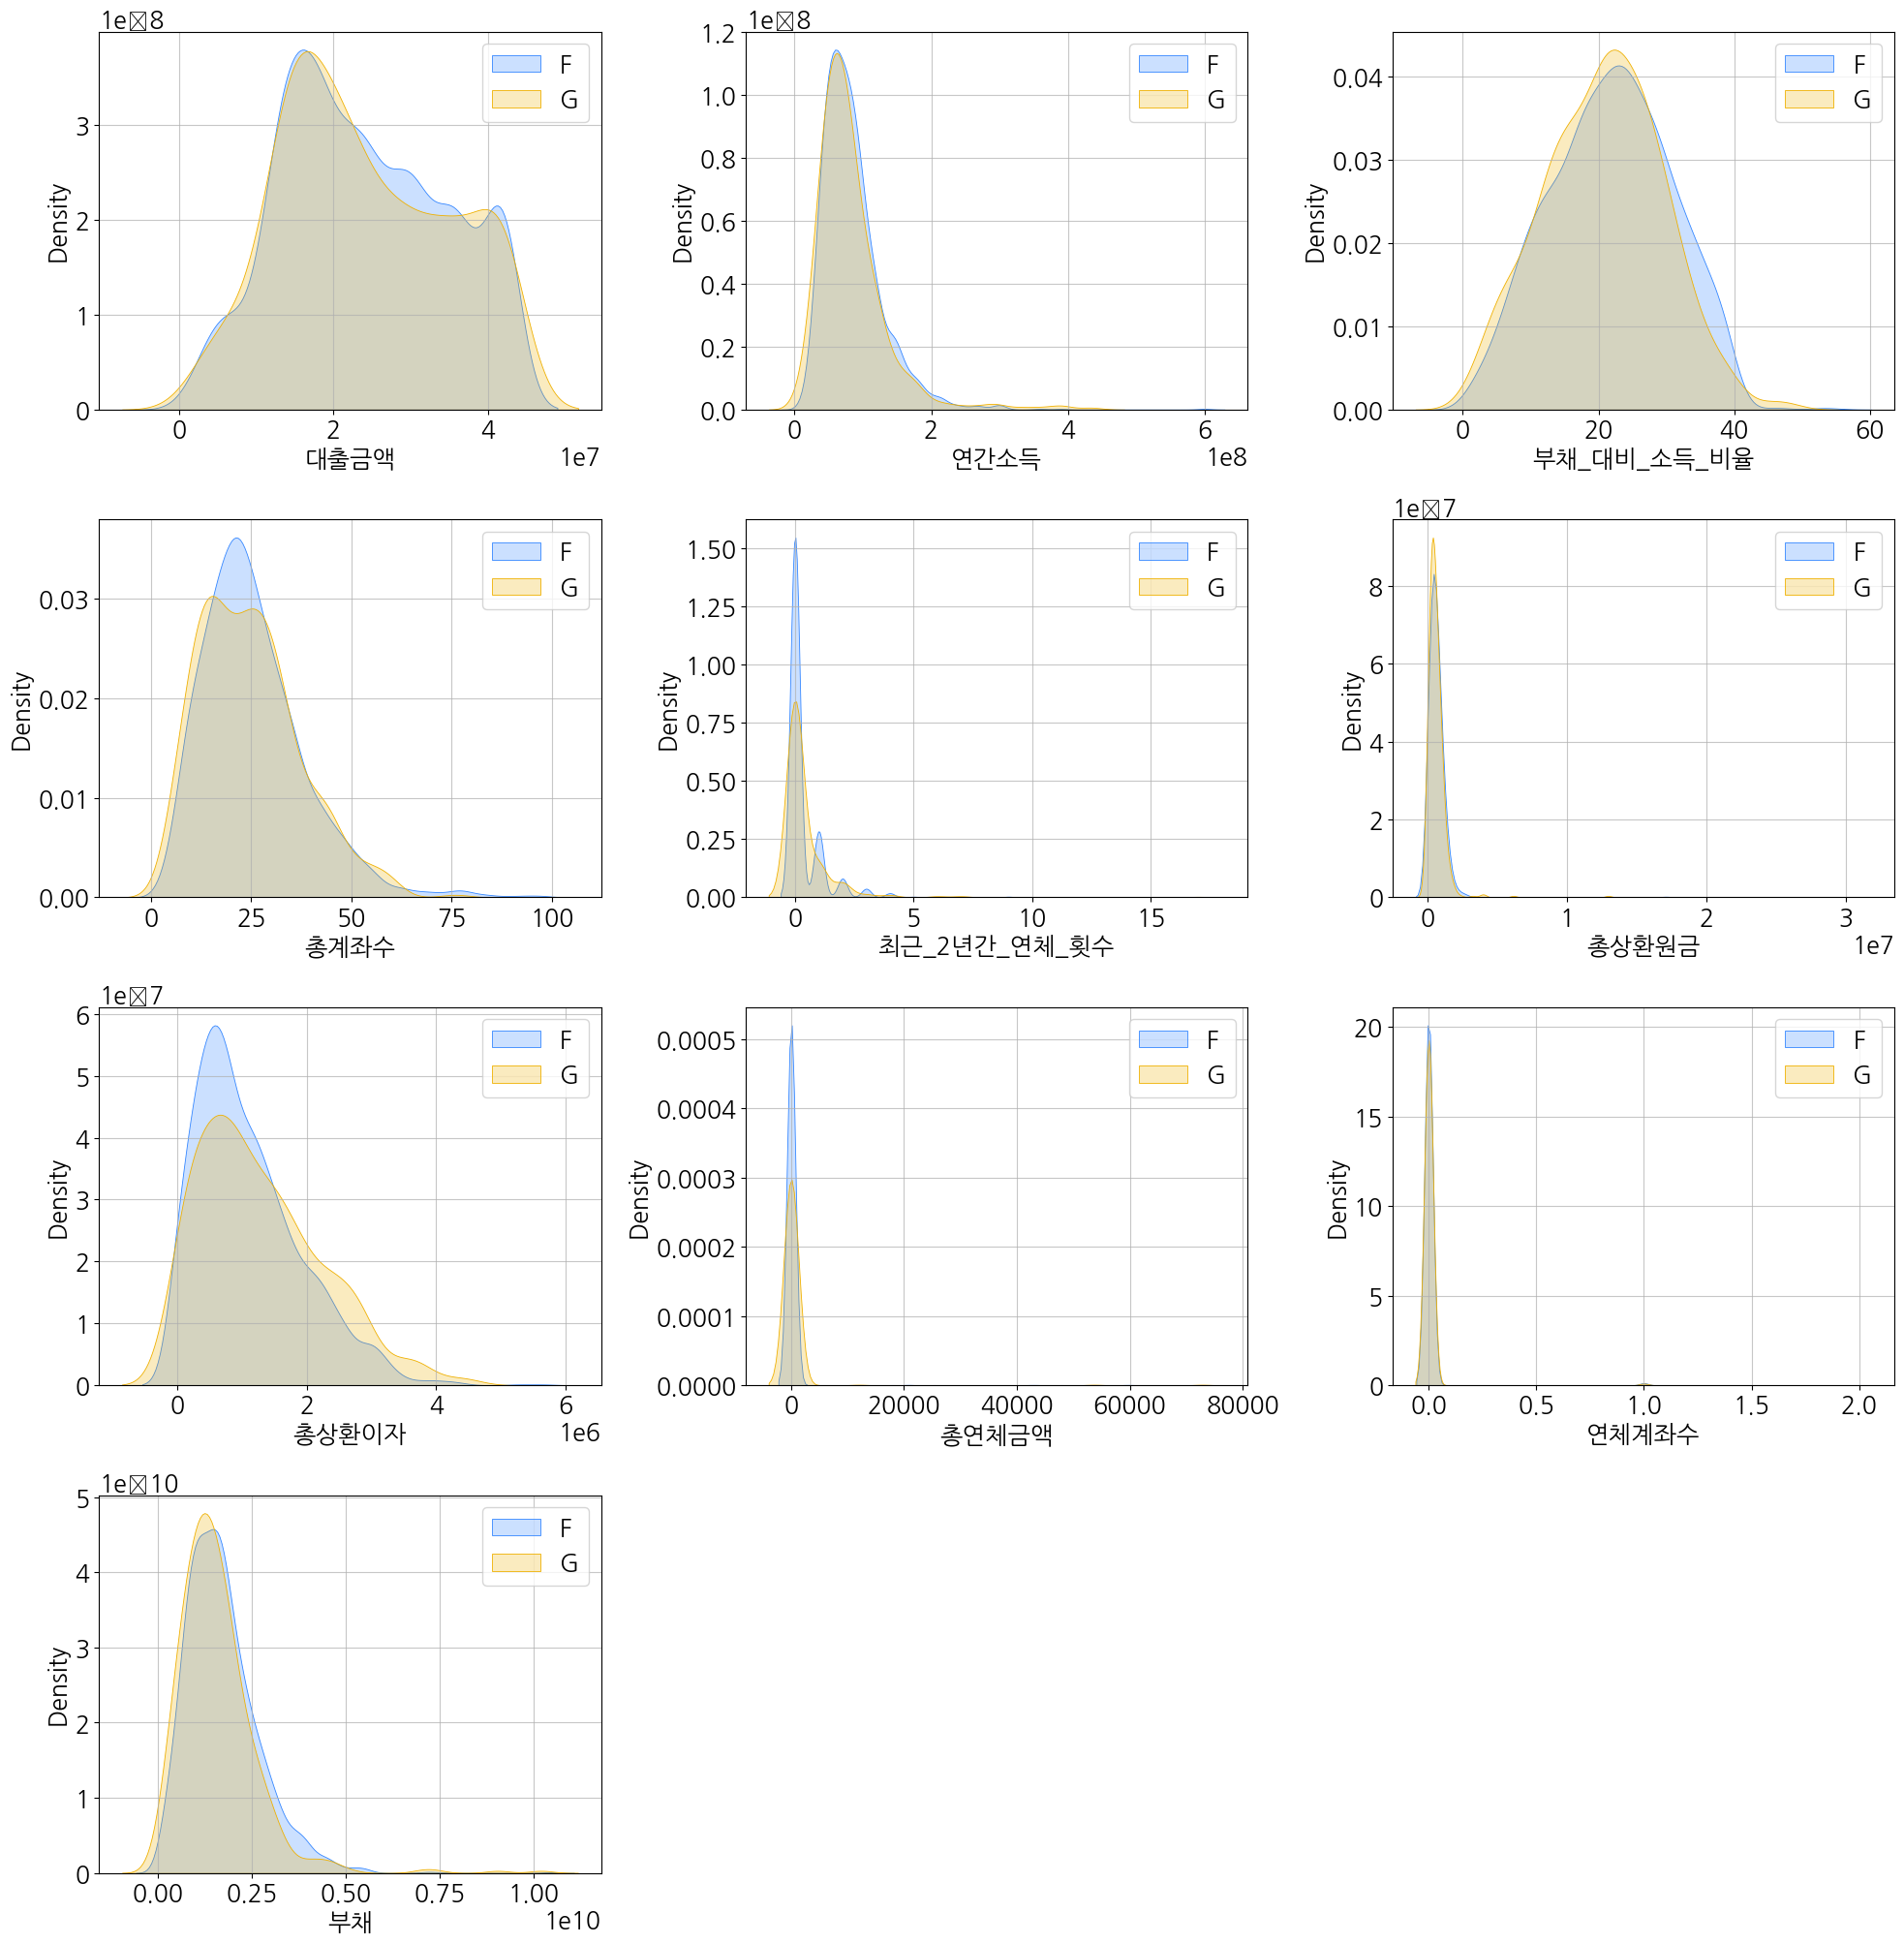

In [46]:
numeric_columns = train.drop(columns=['ID']).select_dtypes(include='number')

fig = plt.figure(figsize=(20, 50))
rows, cols = 10, 3
for idx, num in enumerate(numeric_columns[:30]):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.grid(alpha = 0.7, axis ="both")
    sns.kdeplot(x = num, fill = True,color ="#3386FF",linewidth=0.6, data = train[train['대출등급']=='F'], label = "F")
    sns.kdeplot(x = num, fill = True,color ="#EFB000",linewidth=0.6, data = train[train['대출등급']=='G'], label = "G")
    ax.set_xlabel(num)
    ax.legend()
fig.tight_layout()
fig.show()

#df_out

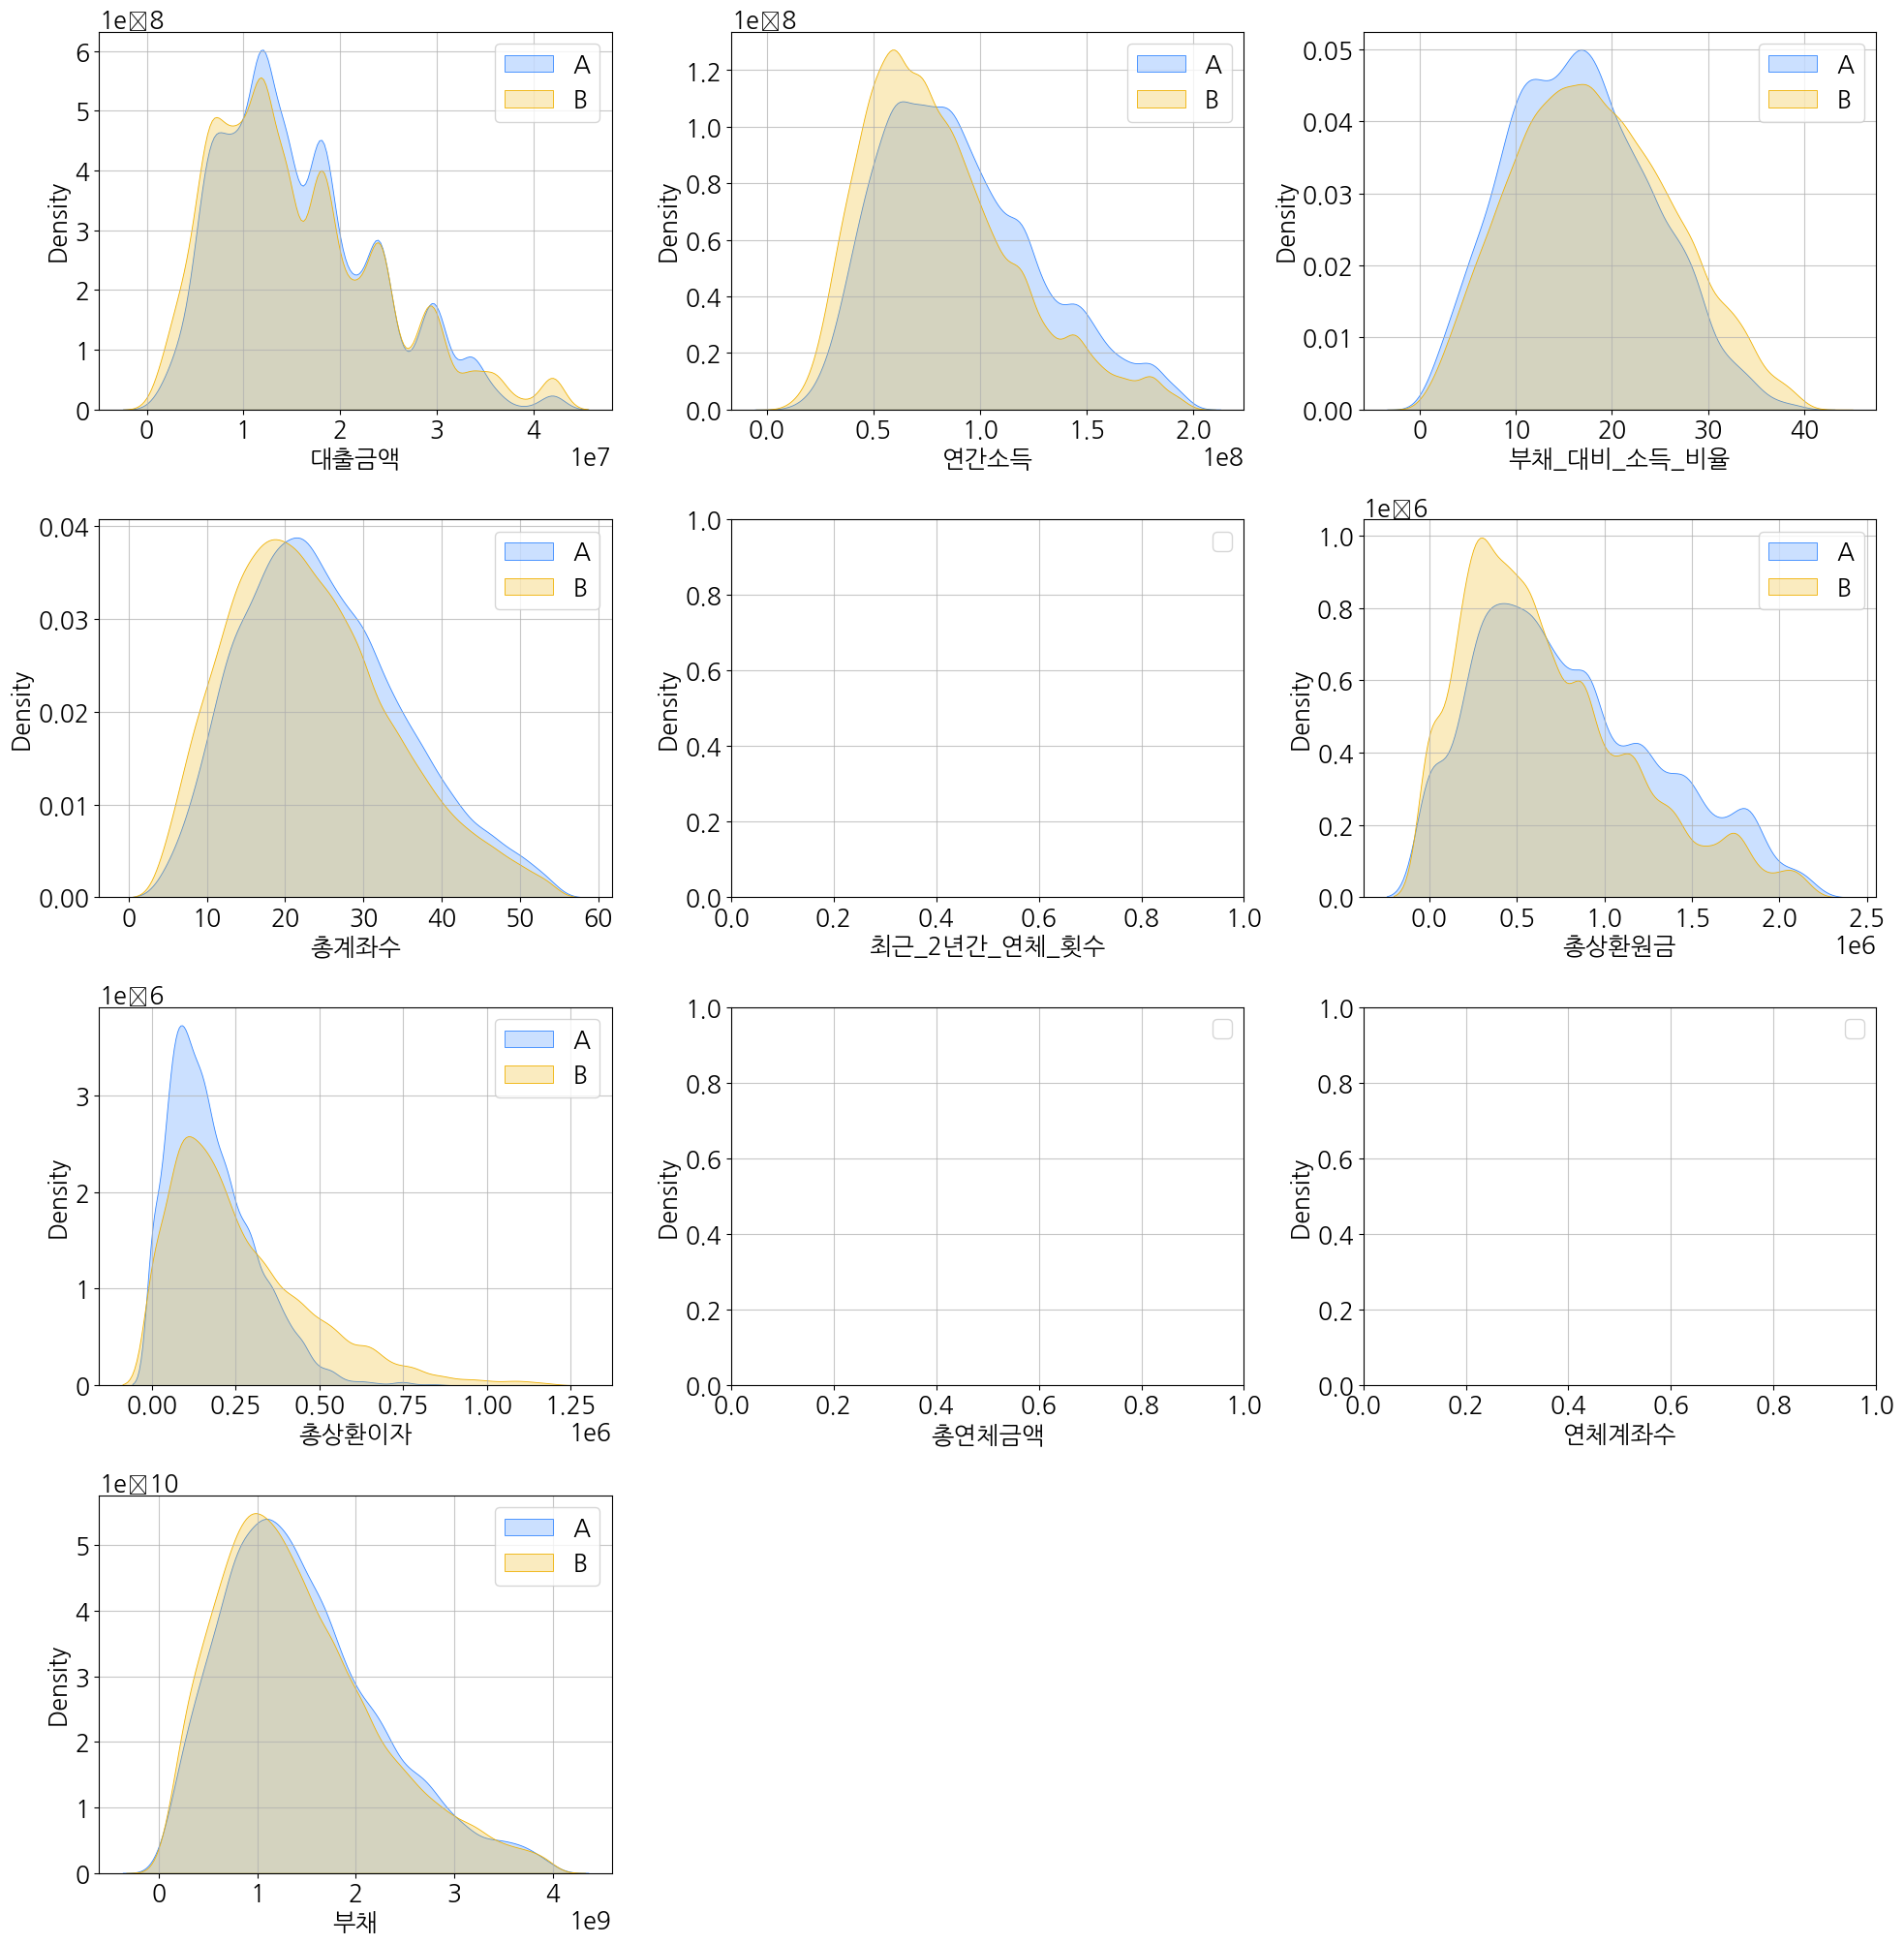

In [48]:
numeric_columns = train.drop(columns=['ID']).select_dtypes(include='number')

fig = plt.figure(figsize=(20, 50))
rows, cols = 10, 3
for idx, num in enumerate(numeric_columns[:30]):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.grid(alpha = 0.7, axis ="both")
    sns.kdeplot(x = num, fill = True,color ="#3386FF",linewidth=0.6, data = df_out[df_out['대출등급']=='A'], label = "A")
    sns.kdeplot(x = num, fill = True,color ="#EFB000",linewidth=0.6, data = df_out[df_out['대출등급']=='B'], label = "B")
    ax.set_xlabel(num)
    ax.legend()
fig.tight_layout()
fig.show()

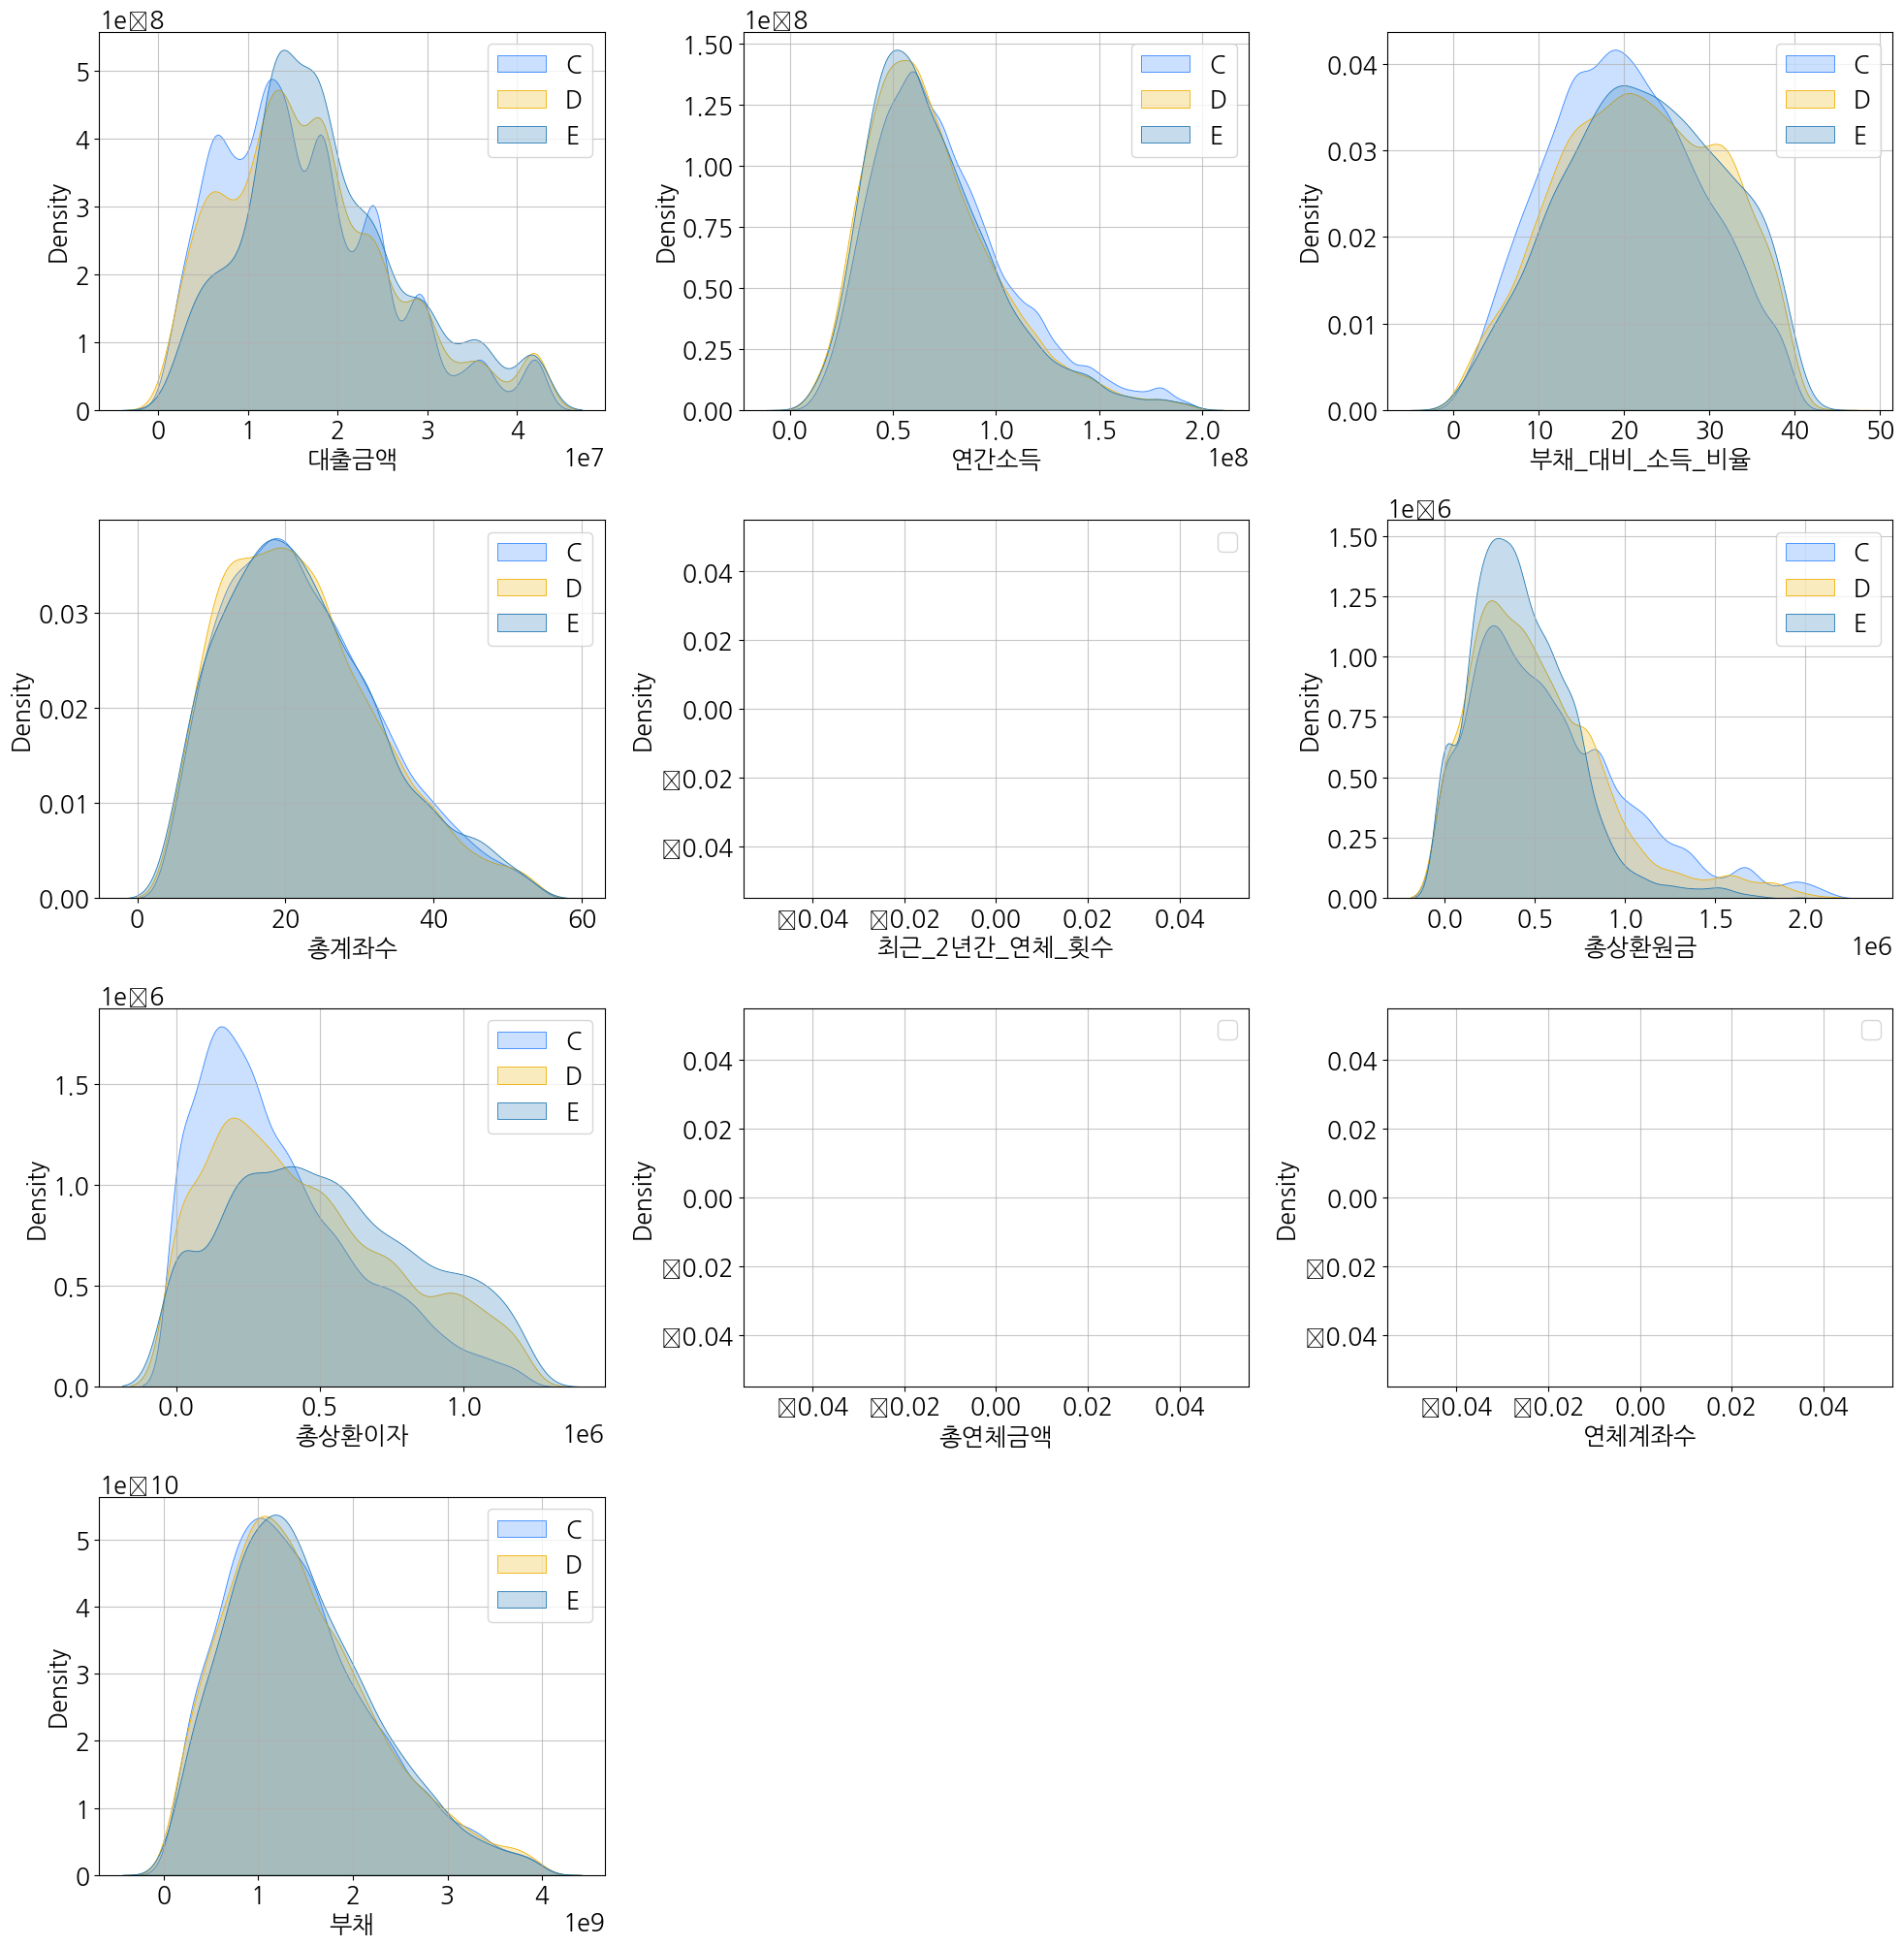

In [49]:
numeric_columns = train.drop(columns=['ID']).select_dtypes(include='number')

fig = plt.figure(figsize=(20, 50))
rows, cols = 10, 3
for idx, num in enumerate(numeric_columns[:30]):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.grid(alpha = 0.7, axis ="both")
    sns.kdeplot(x = num, fill = True,color ="#3386FF",linewidth=0.6, data = df_out[df_out['대출등급']=='C'], label = "C")
    sns.kdeplot(x = num, fill = True,color ="#EFB000",linewidth=0.6, data = df_out[df_out['대출등급']=='D'], label = "D")
    sns.kdeplot(x = num, fill = True,linewidth=0.6, data = df_out[df_out['대출등급']=='E'], label = "E")
    ax.set_xlabel(num)
    ax.legend()
fig.tight_layout()
fig.show()

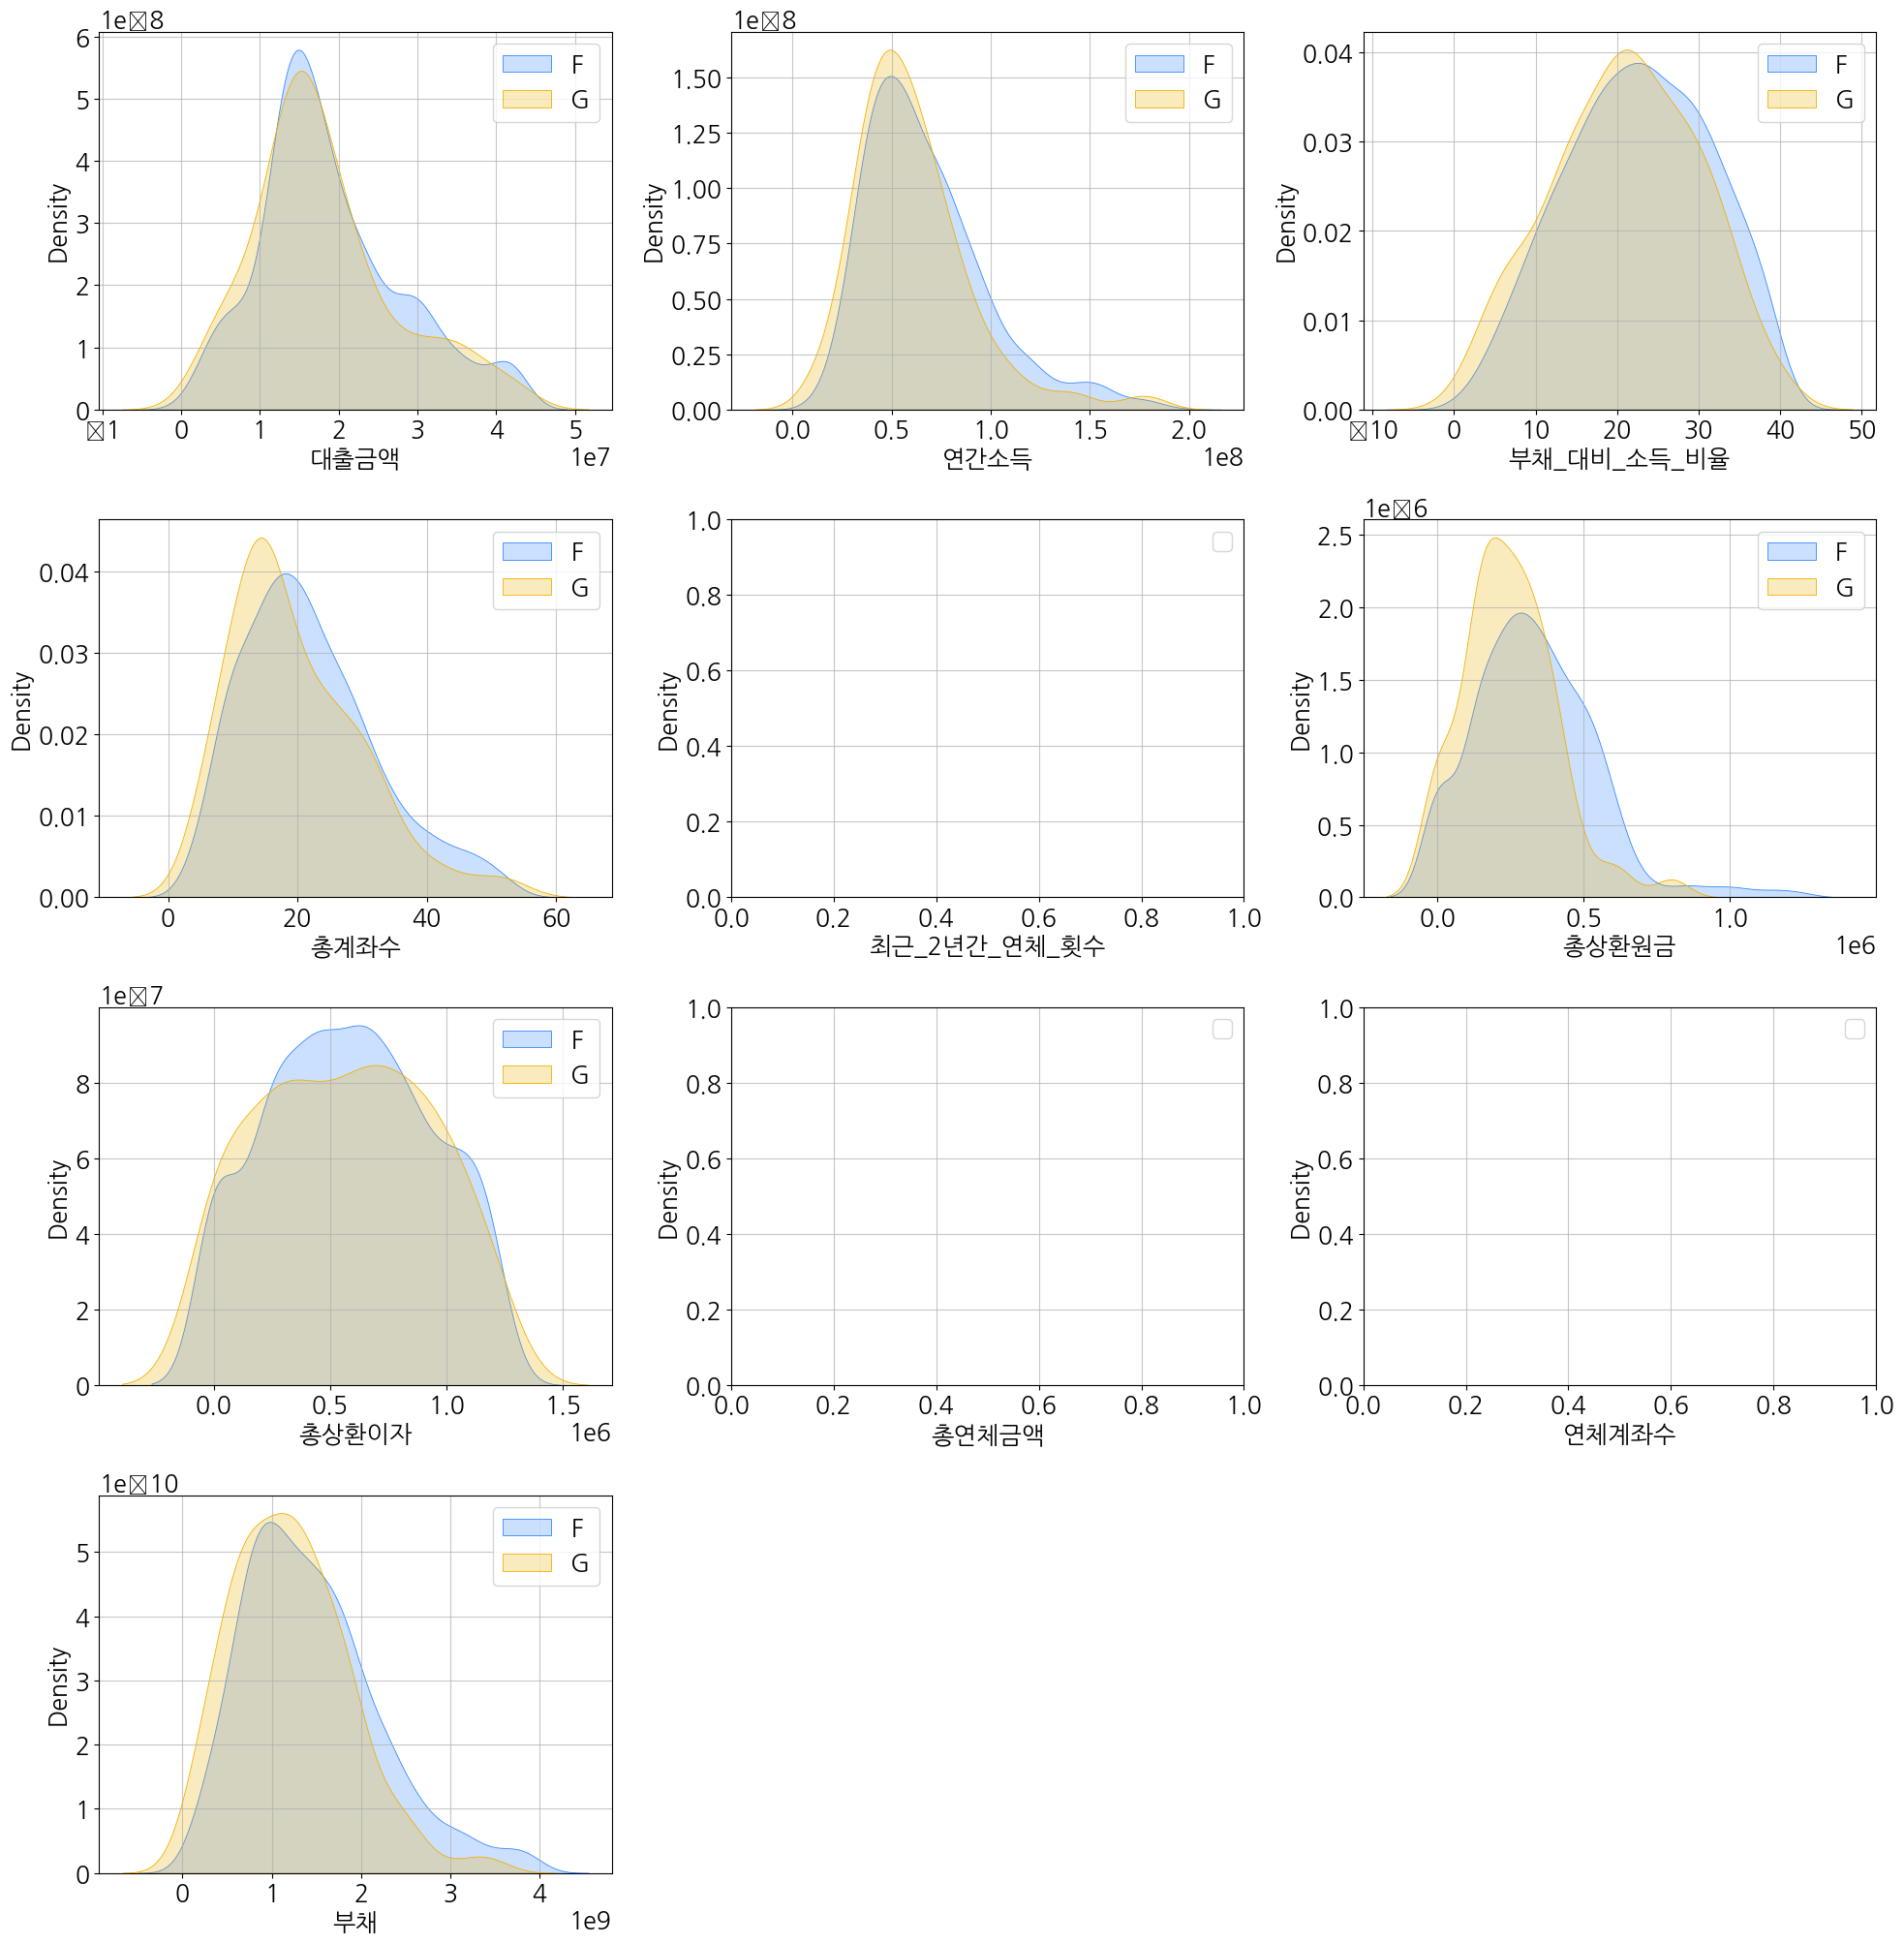

In [50]:
numeric_columns = train.drop(columns=['ID']).select_dtypes(include='number')

fig = plt.figure(figsize=(20, 50))
rows, cols = 10, 3
for idx, num in enumerate(numeric_columns[:30]):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.grid(alpha = 0.7, axis ="both")
    sns.kdeplot(x = num, fill = True,color ="#3386FF",linewidth=0.6, data = df_out[df_out['대출등급']=='F'], label = "F")
    sns.kdeplot(x = num, fill = True,color ="#EFB000",linewidth=0.6, data = df_out[df_out['대출등급']=='G'], label = "G")
    ax.set_xlabel(num)
    ax.legend()
fig.tight_layout()
fig.show()

In [76]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
kmeans = KMeans(n_clusters=2, random_state=42)

df = train.copy()
a = df.drop(['대출등급'],axis=1)
df['cluster'] = kmeans.fit_predict(a[['총상환이자','총연체금액']])

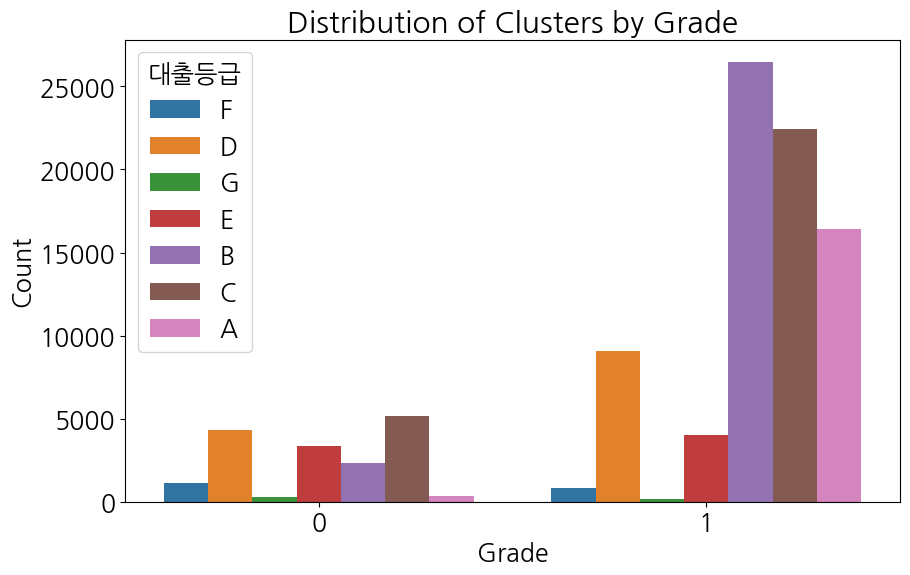

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with 'grade' and 'cluster' columns
# You might need to replace 'df' with the actual DataFrame name in your code

# Create a count plot to visualize the distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', hue='대출등급', data=df)
plt.title('Distribution of Clusters by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

In [116]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
kmeans = KMeans(n_clusters=2, random_state=42)

df2 = train_1.copy()
a = df2.drop(['대출등급','cluster'],axis=1)
df2['cluster'] = kmeans.fit_predict(a[['대출금액','대출기간','총상환이자','총연체금액']])

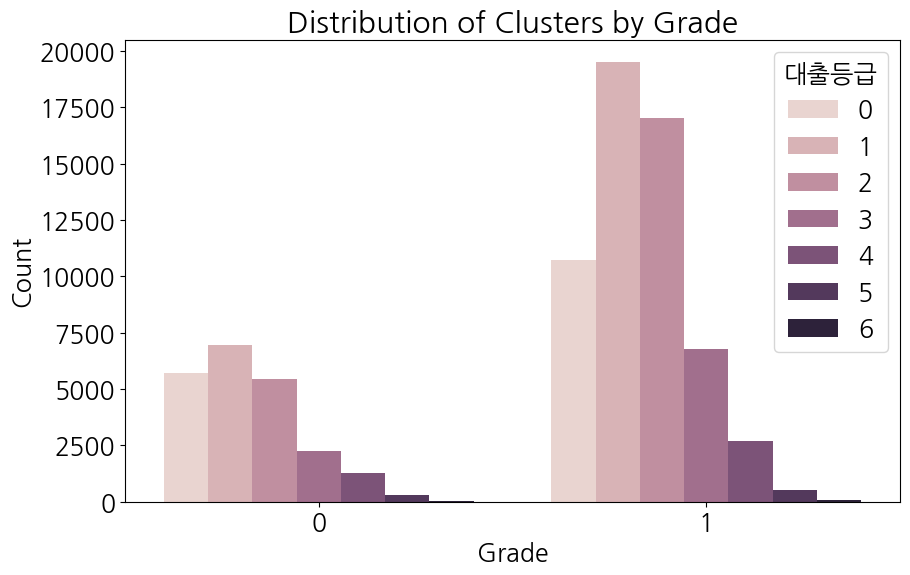

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with 'grade' and 'cluster' columns
# You might need to replace 'df' with the actual DataFrame name in your code

# Create a count plot to visualize the distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', hue='대출등급', data=df2)
plt.title('Distribution of Clusters by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

In [67]:
train.drop(['ID'],axis=1,inplace=True)
test.drop(['ID'],axis=1,inplace=True)

In [68]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [77]:
train_0 = df[df['cluster']==0].reset_index(drop=True)
train_1 = df[df['cluster']==1].reset_index(drop=True)

In [79]:
from sklearn.model_selection import train_test_split
X = train_0.drop(['대출등급','cluster'], axis=1)
y = train_0['대출등급']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

In [80]:
from sklearn.model_selection import KFold
kf = StratifiedKFold(n_splits=5, shuffle=False)

In [81]:
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=7, random_state=42)
xgb_model.fit(X_train,y_train)

score = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='f1_macro')

In [82]:
score, score.mean()

(array([0.82197777, 0.84980014, 0.86710284, 0.85494759, 0.86419944]),
 0.8516055535851204)

In [83]:
from sklearn.model_selection import train_test_split
X = train_1.drop(['대출등급','cluster'], axis=1)
y = train_1['대출등급']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

In [84]:
from sklearn.model_selection import KFold
kf = StratifiedKFold(n_splits=5, shuffle=False)

In [85]:
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=7, random_state=42)
xgb_model.fit(X_train,y_train)

score = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='f1_macro')

In [86]:
score, score.mean()

(array([0.73688143, 0.67873312, 0.68054661, 0.69307421, 0.68784223]),
 0.6954155218599457)

In [87]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline, make_pipeline

In [88]:
#new
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_tr, y_tr = resample.fit_resample(X_train, y_train)

In [89]:
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=7, random_state=42)
xgb_model.fit(X_tr,y_tr)

score = cross_val_score(xgb_model, X_tr, y_tr, cv=kf, scoring='f1_macro')

In [90]:
score,score.mean()

(array([0.86017528, 0.87184117, 0.87214138, 0.88214233, 0.85717578]),
 0.8686951888110721)

In [92]:
from sklearn.metrics import f1_score
y_pred = xgb_model.predict(X_test)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_macro

0.6869283162391688

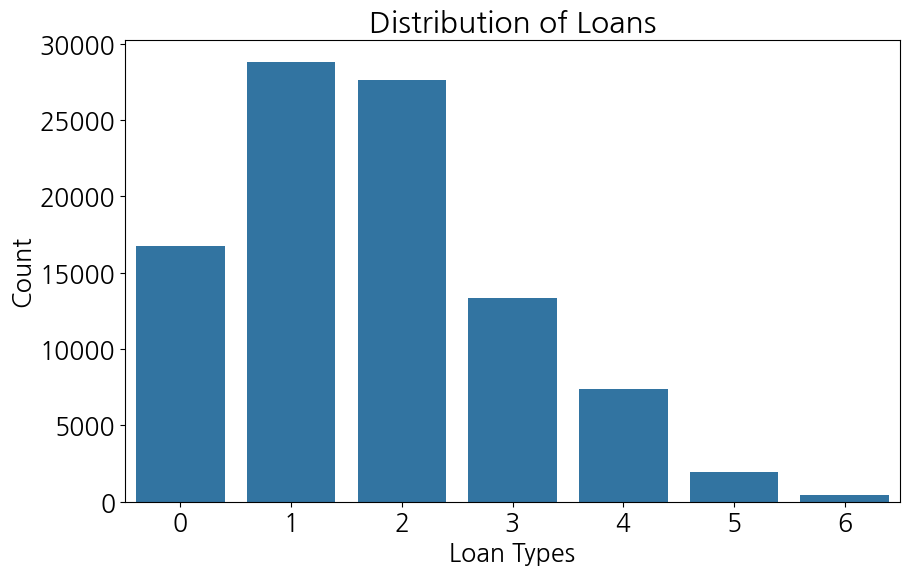

In [93]:
loan_counts = train['대출등급'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=loan_counts.index, y=loan_counts.values)
plt.title('Distribution of Loans')
plt.xlabel('Loan Types')
plt.ylabel('Count')
plt.show()

In [118]:
train2_0 = df2[df2['cluster']==0].reset_index(drop=True)

In [119]:
from sklearn.model_selection import train_test_split
X = train2_0.drop(['대출등급','cluster'], axis=1)
y = train2_0['대출등급']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

In [120]:
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=7, random_state=42)
xgb_model.fit(X_train,y_train)

score = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='f1_macro')

In [121]:
score,score.mean()

(array([0.70071464, 0.71787963, 0.67146868, 0.68295192, 0.6884514 ]),
 0.6922932545070264)

##ver2

In [168]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
kmeans = KMeans(n_clusters=2, random_state=42)

df = df_out.copy()
a = df.drop(['대출등급'],axis=1)
df['cluster'] = kmeans.fit_predict(a[['총상환이자','총연체금액']])

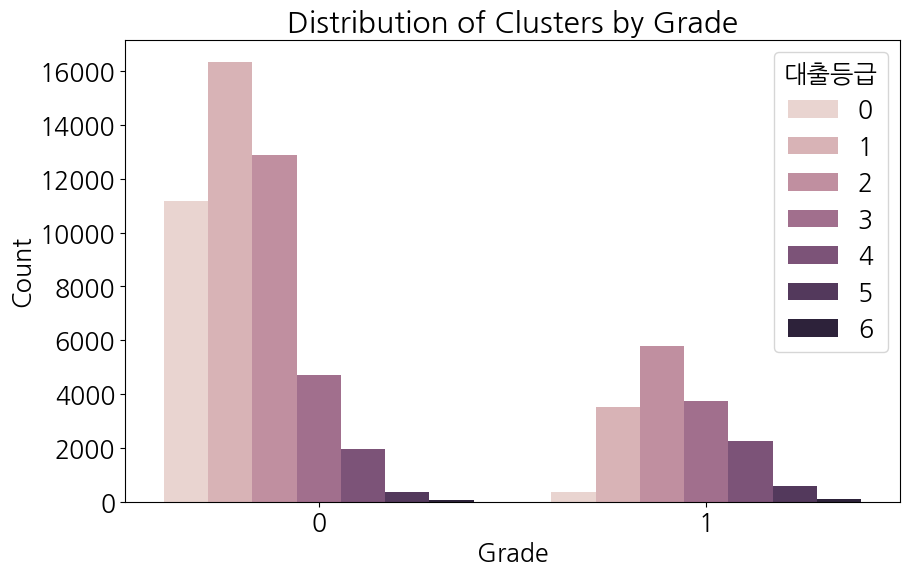

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with 'grade' and 'cluster' columns
# You might need to replace 'df' with the actual DataFrame name in your code

# Create a count plot to visualize the distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', hue='대출등급', data=df)
plt.title('Distribution of Clusters by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

In [170]:
train_0 = df[df['cluster']==0].reset_index(drop=True)
train_1 = df[df['cluster']==1].reset_index(drop=True)

In [171]:
from sklearn.model_selection import train_test_split
X = train_0.drop(['ID','대출등급','cluster'], axis=1)
y = train_0['대출등급']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

In [172]:
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=7, random_state=42)
xgb_model.fit(X_train,y_train)

score = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='f1_macro')

In [173]:
score,score.mean()

(array([0.66877143, 0.6746816 , 0.6192381 , 0.64829526, 0.63982751]),
 0.6501627798254277)

In [174]:
from sklearn.model_selection import train_test_split
X = train_1.drop(['ID','대출등급','cluster'], axis=1)
y = train_1['대출등급']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

In [175]:
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=7, random_state=42)
xgb_model.fit(X_train,y_train)

score = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='f1_macro')

In [176]:
score,score.mean()

(array([0.8447638 , 0.79230662, 0.77264876, 0.76558194, 0.81380298]),
 0.7978208204285705)